# **CP462 Project:   Group 14**

# หัวข้อ : **Students' Social Media Addiction**

**สมาชิก:**
<br>1)นายภูริณัฐ สาทรกิจ 66102010150<br>
2)นางสาวจิณณพัต ทองบ้านกวย 66102010232  
3)นางสาวญาณิศา ล้อมเมตตา 66102010237  
4)นางสาวพชรชล แก้วภูศรี 66102010569
<br><br>
**Dataset:** "การเสพติดโซเชียลมีเดียของนักเรียน" (Students' Social Media Addiction) โดยข้อมูลจะเน้นไปที่การวิเคราะห์ความสัมพันธ์ระหว่างการใช้โซเชียลมีเดียกับผลกระทบในด้านต่างๆ ของชีวิต<br>
**Source:** https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships


# Import Packages

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Import Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")

print("Path to dataset files:", path)

100%|██████████| 7.67k/7.67k [00:00<00:00, 12.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/social-media-addiction-vs-relationships/versions/3


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv(f"{path}/Students Social Media Addiction.csv")

## Data Acquisition

### **ดูตัวอย่างข้อมูลจริง**

In [ ]:

print('Shape (rows, cols):', df.shape) # ดูขนาดข้อมูล (จำนวนแถว x คอลัมน์)
display(df.head())
print("---------------")
display(df.tail())

Shape (rows, cols): (705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


---------------


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


### Check Columns

In [ ]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

### **ดูชนิดข้อมูล (Data Types)**

In [ ]:
print("Info:")
print(df.info()) # โครงสร้างข้อมูล (dtype, non-null count)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtyp

### **ดูค่าสถิติ พื้นฐาน**

In [ ]:
print("\nSummary Statistics for numerical columns:")
display(df.describe())


Summary Statistics for numerical columns:


,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


### Check Missing Values

In [ ]:
print('\nMissing values per column:')
print(df.isnull().sum())  # นับจำนวน missing values ในแต่ละคอลัมน์


Missing values per column:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


### Duplicate

In [ ]:
# ตรวจสอบข้อมูลซ้ำ (Duplicate Rows)
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


### Check Outlier

ตรวจหาค่าผิดปกติ (Outliers) โดยใช้ IQR method:
'Student_ID': พบค่าผิดปกติ 0 ค่า


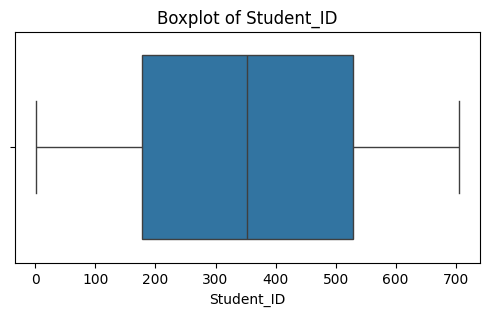

'Age': พบค่าผิดปกติ 0 ค่า


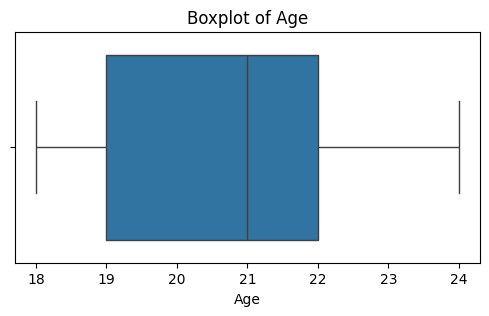

'Avg_Daily_Usage_Hours': พบค่าผิดปกติ 3 ค่า


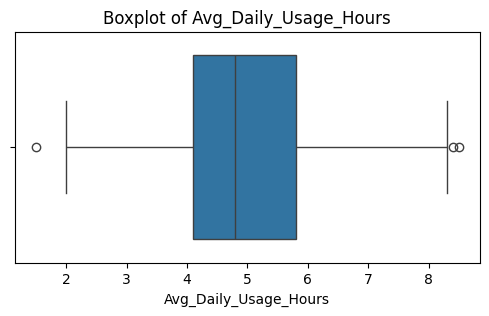

'Sleep_Hours_Per_Night': พบค่าผิดปกติ 0 ค่า


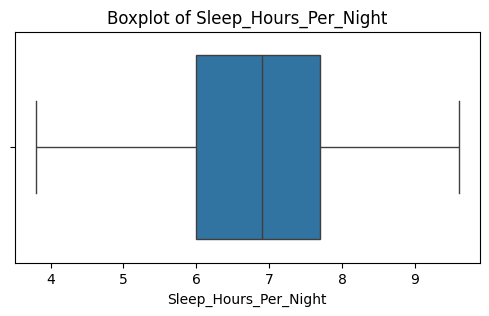

'Mental_Health_Score': พบค่าผิดปกติ 0 ค่า


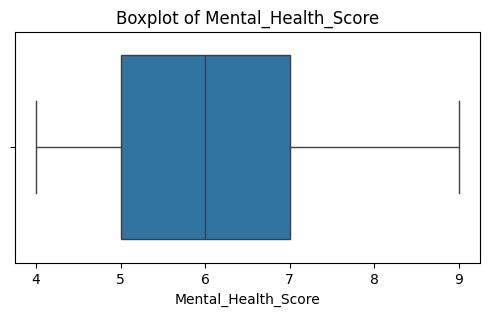

'Conflicts_Over_Social_Media': พบค่าผิดปกติ 0 ค่า


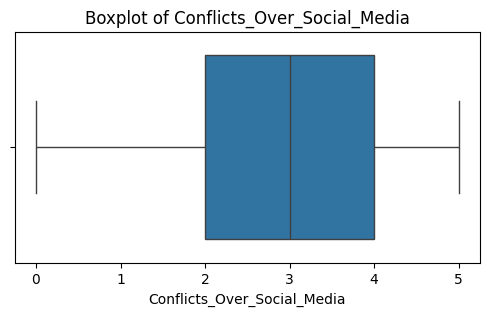

'Addicted_Score': พบค่าผิดปกติ 0 ค่า


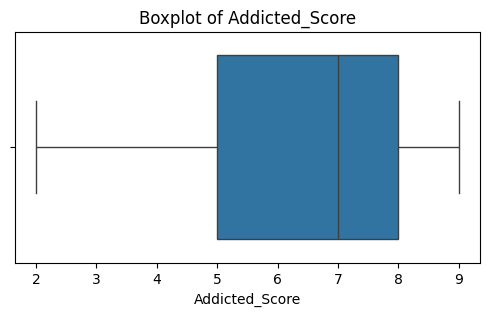

In [ ]:
# ระบุคอลัมน์ที่เป็นตัวเลข
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("ตรวจหาค่าผิดปกติ (Outliers) โดยใช้ IQR method:")

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"'{col}': พบค่าผิดปกติ {outliers.shape[0]} ค่า")

    # วาด Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


## Cleaning

Fix Outlier

In [ ]:
# แทนที่ค่าที่เป็นเศษส่วนด้วยการปัดเศษขึ้นลง
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))
    return df

# ใช้กับทั้งสองคอลัมน์
df = cap_outliers_iqr(df, 'Avg_Daily_Usage_Hours')
df = cap_outliers_iqr(df, 'Sleep_Hours_Per_Night')

Create Boxplot

ตรวจหาค่าผิดปกติ (Outliers) โดยใช้ IQR method:
'Student_ID': พบค่าผิดปกติ 0 ค่า


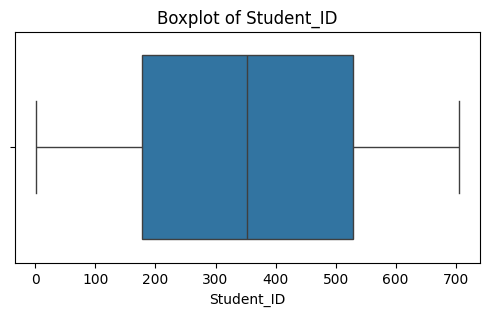

'Age': พบค่าผิดปกติ 0 ค่า


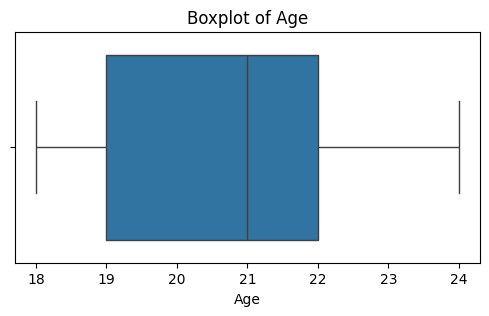

'Avg_Daily_Usage_Hours': พบค่าผิดปกติ 0 ค่า


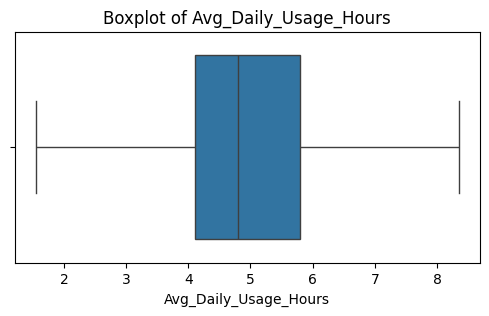

'Sleep_Hours_Per_Night': พบค่าผิดปกติ 0 ค่า


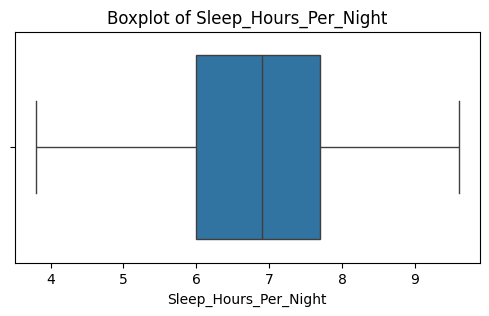

'Mental_Health_Score': พบค่าผิดปกติ 0 ค่า


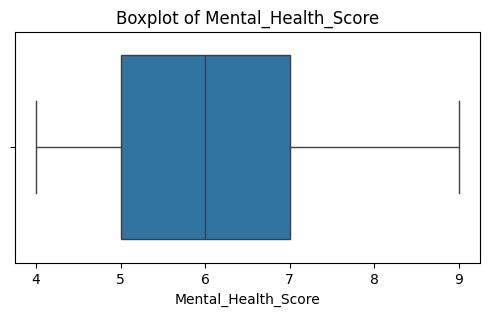

'Conflicts_Over_Social_Media': พบค่าผิดปกติ 0 ค่า


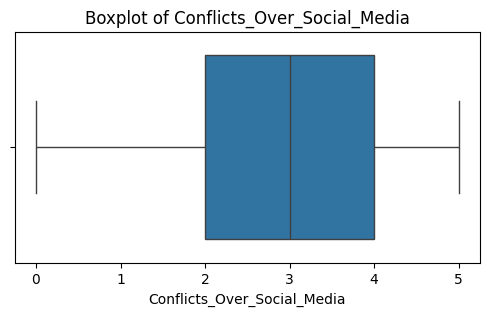

'Addicted_Score': พบค่าผิดปกติ 0 ค่า


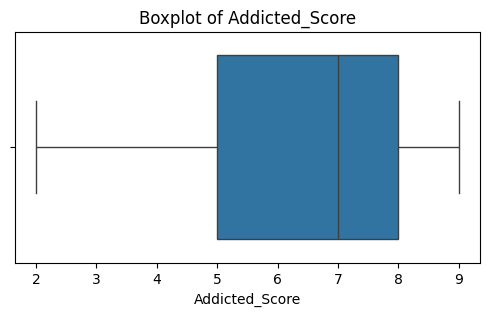

In [ ]:
# ระบุคอลัมน์ที่เป็นตัวเลข
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("ตรวจหาค่าผิดปกติ (Outliers) โดยใช้ IQR method:")

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"'{col}': พบค่าผิดปกติ {outliers.shape[0]} ค่า")

    # วาด Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
import numpy as np
from scipy import stats

# กำหนดคอลัมน์ที่เป็นตัวเลข
numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

# เช็ค outliers ในแต่ละคอลัมน์
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))  # คำนวณ Z-score
    outliers = df[col][z_scores > 3]  # คัดเลือก outliers (ค่าที่ Z-score > 3)
    print(f"\nคอลัมน์ {col}: พบ Outliers (Z-score > 3) = {outliers.shape[0]} ค่า")



คอลัมน์ Age: พบ Outliers (Z-score > 3) = 0 ค่า

คอลัมน์ Avg_Daily_Usage_Hours: พบ Outliers (Z-score > 3) = 0 ค่า

คอลัมน์ Sleep_Hours_Per_Night: พบ Outliers (Z-score > 3) = 0 ค่า

คอลัมน์ Mental_Health_Score: พบ Outliers (Z-score > 3) = 0 ค่า

คอลัมน์ Conflicts_Over_Social_Media: พบ Outliers (Z-score > 3) = 0 ค่า

คอลัมน์ Addicted_Score: พบ Outliers (Z-score > 3) = 0 ค่า


Check Missing Values After Clean Data

In [ ]:
#Missing value
print(df.isnull().sum())

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


## Transforming

Addicted_Score (Label Encoding)



In [ ]:
# Label Encoding แบบ Manual Mapping สำหรับ Academic_Level

# กำหนด mapping ตามลำดับการศึกษา
academic_mapping = {
    'High School': 0,
    'Undergraduate': 1,
    'Graduate': 2
}

# แปลง Academic_Level เป็นตัวเลข
df['Academic_Level_Label'] = df['Academic_Level'].map(academic_mapping)

# ตรวจสอบผลลัพธ์
print("Mapping:", academic_mapping)
df[['Academic_Level', 'Academic_Level_Label']].head(10)


Mapping: {'High School': 0, 'Undergraduate': 1, 'Graduate': 2}


,Academic_Level,Academic_Level_Label
0,Undergraduate,1
1,Graduate,2
2,Undergraduate,1
3,High School,0
4,Graduate,2
5,Undergraduate,1
6,Graduate,2
7,Undergraduate,1
8,High School,0
9,Graduate,2


In [ ]:
# Label Encoding สำหรับ Gender

# กำหนด mapping
gender_mapping = {
    'Male': 0,
    'Female': 1
}

# เนื่องจาก df['Gender'] อาจถูกแก้ไขเป็น NaN ในการรันก่อนหน้า
# เราจะโหลดข้อมูล Gender ดั้งเดิมกลับมาใช้ชั่วคราว เพื่อให้การ Map ทำงานได้ถูกต้อง
# (สมมติว่า 'path' จากเซลล์ก่อนหน้ายังคงใช้งานได้)
# import pandas as pd # pandas ควรถูก import แล้ว
# import kagglehub # kagglehub ควรถูก import แล้ว

# โหลดข้อมูลดิบชั่วคราวเพื่อดึงคอลัมน์ Gender ดั้งเดิม
temp_df_raw = pd.read_csv(f"{path}/Students Social Media Addiction.csv")
df['Gender'] = temp_df_raw['Gender']

# แปลง Gender เป็นตัวเลข
df['Gender'] = df['Gender'].map(gender_mapping)

# ตรวจสอบผลลัพธ์
print("Mapping:", gender_mapping)
display(df[['Gender']].head(10))

Mapping: {'Male': 0, 'Female': 1}


,Gender
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,1
8,0
9,1


In [ ]:
display(df.head())

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Academic_Level_Label
0,1,19,1,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,1
1,2,22,0,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,2
2,3,20,1,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,1
3,4,18,0,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,0
4,5,21,0,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,2


In [ ]:
# Perform Label Encoding for 'Most_Used_Platform'
df['Most_Used_Platform_Encoded'], unique_platforms = pd.factorize(df['Most_Used_Platform'])

# Display the mapping
print("Mapping of Most_Used_Platform:")
for i, platform in enumerate(unique_platforms):
    print(f"  {platform}: {i}")

# Display the original and new encoded columns
print("\nFirst 10 rows with Most_Used_Platform_Encoded:")
display(df[['Most_Used_Platform', 'Most_Used_Platform_Encoded']].head(10))

Mapping of Most_Used_Platform:
  Instagram: 0
  Twitter: 1
  TikTok: 2
  YouTube: 3
  Facebook: 4
  LinkedIn: 5
  Snapchat: 6
  LINE: 7
  KakaoTalk: 8
  VKontakte: 9
  WhatsApp: 10
  WeChat: 11

First 10 rows with Most_Used_Platform_Encoded:


,Most_Used_Platform,Most_Used_Platform_Encoded
0,Instagram,0
1,Twitter,1
2,TikTok,2
3,YouTube,3
4,Facebook,4
5,Instagram,0
6,LinkedIn,5
7,Snapchat,6
8,TikTok,2
9,Instagram,0


In [ ]:
# Label Encoding สำหรับ Affects_Academic_Performance

# กำหนด mapping: 'No' เป็น 0 และ 'Yes' เป็น 1
affects_mapping = {
    'No': 0,
    'Yes': 1
}

# แปลง Affects_Academic_Performance เป็นตัวเลข
df['Affects_Academic_Performance_Encoded'] = df['Affects_Academic_Performance'].map(affects_mapping)

# ตรวจสอบผลลัพธ์
print("Mapping:", affects_mapping)
display(df[['Affects_Academic_Performance', 'Affects_Academic_Performance_Encoded']].head(10))

Mapping: {'No': 0, 'Yes': 1}


,Affects_Academic_Performance,Affects_Academic_Performance_Encoded
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,Yes,1
5,Yes,1
6,No,0
7,Yes,1
8,No,0
9,No,0


In [ ]:
# Perform Label Encoding for 'Relationship_Status'
df['Relationship_Status_Encoded'], unique_statuses = pd.factorize(df['Relationship_Status'])

# Display the mapping
print("Mapping of Relationship_Status:")
for i, status in enumerate(unique_statuses):
    print(f"  {status}: {i}")

# Display the original and new encoded columns
print("\nFirst 10 rows with Relationship_Status_Encoded:")
display(df[['Relationship_Status', 'Relationship_Status_Encoded']].head(10))

Mapping of Relationship_Status:
  In Relationship: 0
  Single: 1
  Complicated: 2

First 10 rows with Relationship_Status_Encoded:


,Relationship_Status,Relationship_Status_Encoded
0,In Relationship,0
1,Single,1
2,Complicated,2
3,Single,1
4,In Relationship,0
5,Complicated,2
6,Single,1
7,In Relationship,0
8,Single,1
9,In Relationship,0


In [ ]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Academic_Level_Label,Most_Used_Platform_Encoded,Affects_Academic_Performance_Encoded,Relationship_Status_Encoded
0,1,19,1,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,1,0,1,0
1,2,22,0,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,2,1,0,1
2,3,20,1,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,1,2,1,2
3,4,18,0,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,0,3,0,1
4,5,21,0,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,2,4,1,0


In [ ]:
# Define a threshold for Addicted_Score to create a binary variable
# Let's assume scores <= 5 mean 'not addicted' (0) and scores >= 6 mean 'addicted' (1)
df['Addicted_Binary'] = df['Addicted_Score'].apply(lambda x: 0 if x <= 5 else 1)

print("Value counts for the new 'Addicted_Binary' column:")
print(df['Addicted_Binary'].value_counts())

print("\nFirst 10 rows with original and binary Addicted_Score:")
display(df[['Addicted_Score', 'Addicted_Binary']].head(10))

Value counts for the new 'Addicted_Binary' column:
Addicted_Binary
1    469
0    236
Name: count, dtype: int64

First 10 rows with original and binary Addicted_Score:


,Addicted_Score,Addicted_Binary
0,8,1
1,3,0
2,9,1
3,4,0
4,7,1
5,9,1
6,2,0
7,8,1
8,5,0
9,4,0


In [ ]:
# Identify numerical columns that are currently float
float_numerical_cols = df.select_dtypes(include=['float64']).columns

print("Converting float numerical columns to int:")
for col in float_numerical_cols:
    # Convert float columns to integer type
    # Note: This will truncate any decimal values.
    df[col] = df[col].astype(int)
    print(f"  - Converted '{col}' to int.")

print("\nNew Data Types after conversion:")
print(df.info())

Converting float numerical columns to int:
  - Converted 'Avg_Daily_Usage_Hours' to int.
  - Converted 'Sleep_Hours_Per_Night' to int.

New Data Types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Student_ID                            705 non-null    int64 
 1   Age                                   705 non-null    int64 
 2   Gender                                705 non-null    int64 
 3   Academic_Level                        705 non-null    object
 4   Country                               705 non-null    object
 5   Avg_Daily_Usage_Hours                 705 non-null    int64 
 6   Most_Used_Platform                    705 non-null    object
 7   Affects_Academic_Performance          705 non-null    object
 8   Sleep_Hours_Per_Night                 705 non-null    int64 


## Enriching

In [ ]:
# 1) Sleep_Category: จัดกลุ่มชั่วโมงนอน โดยจัดเป็นนอนน้อย (<6h)”, “ปกติ (6–8h)”, “มาก (>8h)
df['Sleep_Category'] = pd.cut(
    df['Sleep_Hours_Per_Night'],
    bins=[0, 6, 8, 24],
    labels=['Low', 'Normal', 'High']
)
df[['Addicted_Score' ,'Sleep_Hours_Per_Night','Sleep_Category']].head(10)


,Addicted_Score,Sleep_Hours_Per_Night,Sleep_Category
0,8,6,Low
1,3,7,Normal
2,9,5,Low
3,4,7,Normal
4,7,6,Low
5,9,4,Low
6,2,8,Normal
7,8,6,Low
8,5,6,Low
9,4,7,Normal


In [ ]:
# 2) Usage_Sleep_Ratio: q
df['Usage_Sleep_Ratio'] = (
    df['Avg_Daily_Usage_Hours'] / df['Sleep_Hours_Per_Night']
).round(2)  # ปัดทศนิยม 2 หลักให้อ่านง่าย
df[['Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night','Sleep_Category','Usage_Sleep_Ratio']].head(10)

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Sleep_Category,Usage_Sleep_Ratio
0,5,6,Low,0.83
1,2,7,Normal,0.29
2,6,5,Low,1.20
3,3,7,Normal,0.43
4,4,6,Low,0.67
5,7,4,Low,1.75
6,1,8,Normal,0.12
7,5,6,Low,0.83
8,4,6,Low,0.67
9,3,7,Normal,0.43


In [ ]:
# 3) Platform_Group: จัดหมวดหมู่แพลตฟอร์มเป็น Entertainment / Socializing / Information / Other

# ฟังก์ชันสำหรับจัดกลุ่มแพลตฟอร์มโซเชียลมีเดีย
def group_platform(p):
    # กำหนดกลุ่ม Entertainment (เพื่อความบันเทิง)
    entertainment = ["TikTok", "YouTube", "Instagram"]
    # กำหนดกลุ่ม Socializing (เพื่อการสื่อสาร/พูดคุย)
    socializing = ["Facebook", "WhatsApp", "Messenger", "Snapchat",
                   "LINE", "KakaoTalk", "VKontakte", "WeChat"]
    # กำหนดกลุ่ม Information (เพื่อข้อมูล/ข่าวสาร/วิชาการ)
    information = ["Twitter", "LinkedIn", "Reddit"]

    # ถ้าแพลตฟอร์มอยู่ในกลุ่ม Entertainment → คืนค่า "Entertainment"
    if p in entertainment:
        return "Entertainment"
    # ถ้าแพลตฟอร์มอยู่ในกลุ่ม Socializing → คืนค่า "Socializing"
    elif p in socializing:
        return "Socializing"
    # ถ้าแพลตฟอร์มอยู่ในกลุ่ม Information → คืนค่า "Information"
    elif p in information:
        return "Information"
    # ถ้าไม่อยู่ในกลุ่มใดเลย → จัดเป็น "Other"
    else:
        return "Other"

# สร้างคอลัมน์ใหม่ชื่อ Platform_Group โดยใช้ฟังก์ชัน group_platform
df["Platform_Group"] = df["Most_Used_Platform"].apply(group_platform)

# แสดงตัวอย่าง 10 แถวแรก เพื่อดูว่า Most_Used_Platform ถูกจัดกลุ่มเป็นอะไร
df[['Most_Used_Platform','Platform_Group']].head(10)


,Most_Used_Platform,Platform_Group
0,Instagram,Entertainment
1,Twitter,Information
2,TikTok,Entertainment
3,YouTube,Entertainment
4,Facebook,Socializing
5,Instagram,Entertainment
6,LinkedIn,Information
7,Snapchat,Socializing
8,TikTok,Entertainment
9,Instagram,Entertainment


In [ ]:
 # Perform Label Encoding for 'Platform_Group'
df['Platform_Group_Encoded'], unique_platform_groups = pd.factorize(df['Platform_Group'])

# Display the mapping
print("Mapping of Platform_Group:")
for i, group in enumerate(unique_platform_groups):
    print(f"  {group}: {i}")

# Display the original and new encoded columns
print("\nFirst 10 rows with Platform_Group_Encoded:")
display(df[['Platform_Group', 'Platform_Group_Encoded']].head(10))

Mapping of Platform_Group:
  Entertainment: 0
  Information: 1
  Socializing: 2

First 10 rows with Platform_Group_Encoded:


,Platform_Group,Platform_Group_Encoded
0,Entertainment,0
1,Information,1
2,Entertainment,0
3,Entertainment,0
4,Socializing,2
5,Entertainment,0
6,Information,1
7,Socializing,2
8,Entertainment,0
9,Entertainment,0


In [ ]:
# 1. คำนวณค่า Q1, Q3, และ IQR (เหมือนเดิม)
Q1 = df['Usage_Sleep_Ratio'].quantile(0.25)
Q3 = df['Usage_Sleep_Ratio'].quantile(0.75)
IQR = Q3 - Q1

# 2. กำหนดขอบเขตสำหรับหา Outlier (เหมือนเดิม)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. สร้าง DataFrame ใหม่ 'outliers_df' เพื่อเก็บเฉพาะแถวที่เป็น Outlier
#    โดยเลือกแถวที่ค่า Usage_Sleep_Ratio < ขอบเขตล่าง หรือ ( | ) > ขอบเขตบน
outliers_df = df[(df['Usage_Sleep_Ratio'] < lower_bound) | (df['Usage_Sleep_Ratio'] > upper_bound)]

# 4. แสดงผลลัพธ์
print(f"ขอบเขตล่าง (Lower Bound) ของข้อมูลปกติ: {lower_bound:.2f}")
print(f"ขอบเขตบน (Upper Bound) ของข้อมูลปกติ: {upper_bound:.2f}")
print("-" * 50)

if outliers_df.empty:
  print("ไม่พบข้อมูลที่เป็น Outlier")
else:
  print(f"พบ Outliers ทั้งหมด {len(outliers_df)} แถว:")
  # ใช้ display() เพื่อแสดงตารางใน Notebook ได้สวยงาม
  display(outliers_df)

ขอบเขตล่าง (Lower Bound) ของข้อมูลปกติ: -0.25
ขอบเขตบน (Upper Bound) ของข้อมูลปกติ: 1.75
--------------------------------------------------
พบ Outliers ทั้งหมด 6 แถว:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Addicted_Score,Academic_Level_Label,Most_Used_Platform_Encoded,Affects_Academic_Performance_Encoded,Relationship_Status_Encoded,Addicted_Binary,Sleep_Category,Usage_Sleep_Ratio,Platform_Group,Platform_Group_Encoded
446,447,20,1,Undergraduate,USA,8,TikTok,Yes,4,5,...,9,1,2,1,0,1,Low,2.00,Entertainment,0
456,457,19,1,Undergraduate,USA,8,Instagram,Yes,4,5,...,9,1,0,1,0,1,Low,2.00,Entertainment,0
466,467,20,1,Undergraduate,USA,8,TikTok,Yes,4,5,...,9,1,2,1,0,1,Low,2.00,Entertainment,0
476,477,19,1,Undergraduate,USA,8,Instagram,Yes,4,5,...,9,1,0,1,0,1,Low,2.00,Entertainment,0
486,487,20,1,Undergraduate,USA,8,TikTok,Yes,3,5,...,9,1,2,1,0,1,Low,2.67,Entertainment,0
496,497,19,1,Undergraduate,USA,8,Instagram,Yes,3,5,...,9,1,0,1,0,1,Low,2.67,Entertainment,0


In [ ]:
# outliers_df คือ DataFrame ของกลุ่ม Outlier ที่เรามีอยู่แล้ว

# สร้าง DataFrame ของกลุ่มปกติ โดยการลบแถวที่มี index ตรงกับ outliers_df ออกไป
df_normal = df.drop(outliers_df.index)

print(f"จำนวนข้อมูลกลุ่ม Outlier: {len(outliers_df)} แถว")
print(f"จำนวนข้อมูลกลุ่มปกติ: {len(df_normal)} แถว")

จำนวนข้อมูลกลุ่ม Outlier: 6 แถว
จำนวนข้อมูลกลุ่มปกติ: 699 แถว


/tmp/ipython-input-903197536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_normal, palette='pastel')
/tmp/ipython-input-903197536.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=outliers_df, palette='muted')
/tmp/ipython-input-903197536.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Platform_Group', data=df_normal, palette='pastel')
/tmp/ipython-input-903197536.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

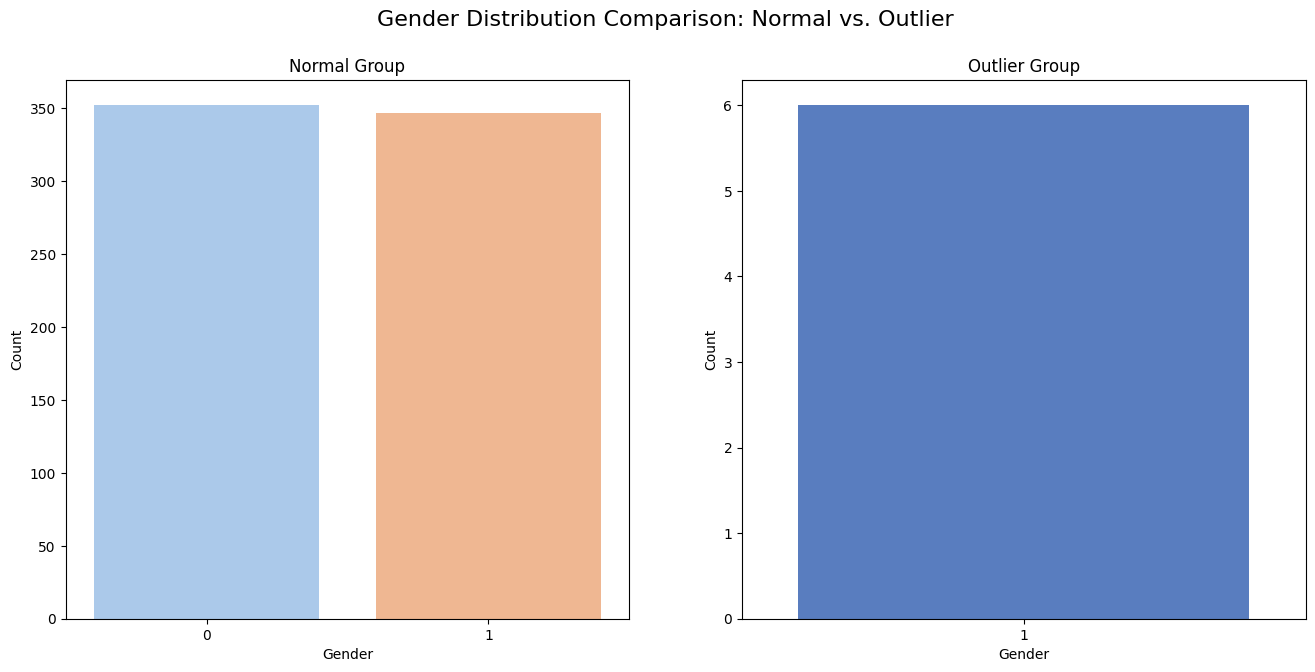

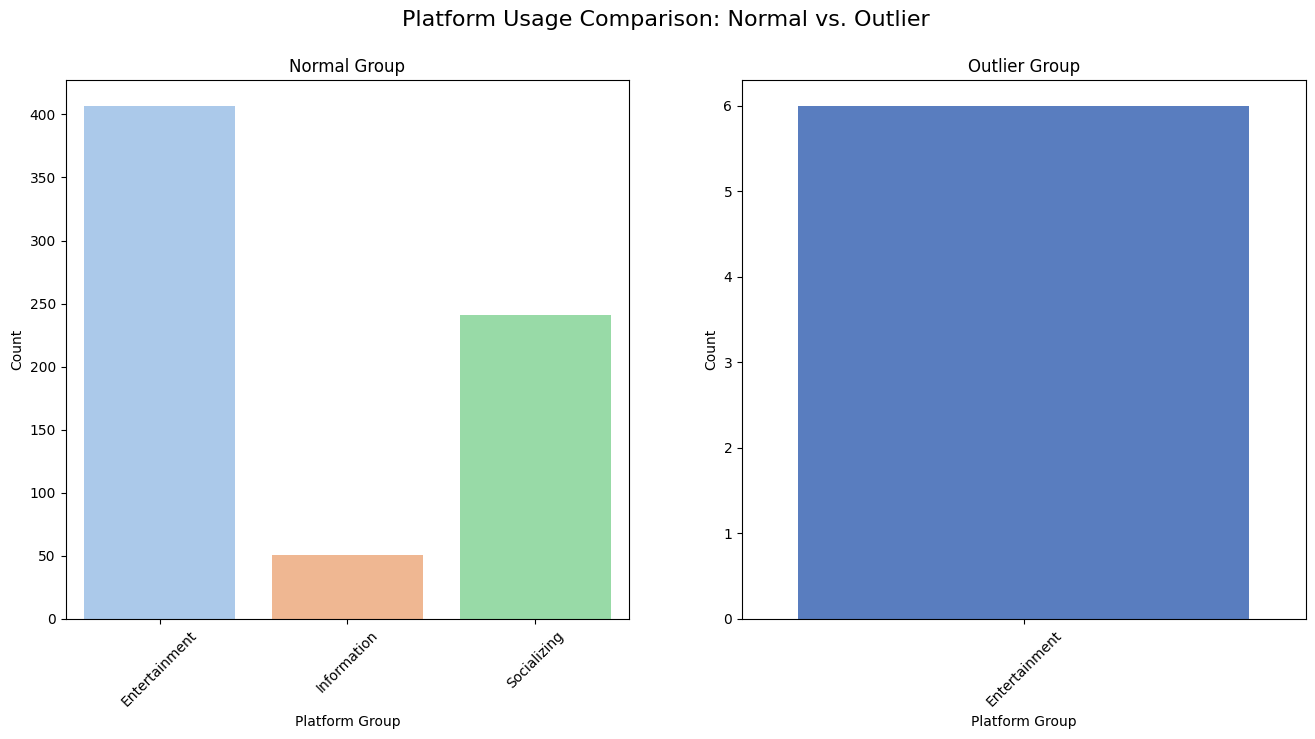

In [ ]:
# 1. สร้าง Figure หรือกรอบรูปขนาดใหญ่
plt.figure(figsize=(16, 7))
plt.suptitle('Gender Distribution Comparison: Normal vs. Outlier', fontsize=16)

# 2. สร้างและเลือกช่องแรก (แถวที่ 1, คอลัมน์ที่ 1 จากทั้งหมด 2 คอลัมน์)
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df_normal, palette='pastel')
plt.title('Normal Group')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. สร้างและเลือกช่องที่สอง (แถวที่ 1, คอลัมน์ที่ 2 จากทั้งหมด 2 คอลัมน์)
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=outliers_df, palette='muted')
plt.title('Outlier Group')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.figure(figsize=(16, 7))
plt.suptitle('Platform Usage Comparison: Normal vs. Outlier', fontsize=16)

# 2. สร้างและเลือกช่องแรก
plt.subplot(1, 2, 1)
sns.countplot(x='Platform_Group', data=df_normal, palette='pastel')
plt.title('Normal Group')
plt.xlabel('Platform Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 3. สร้างและเลือกช่องที่สอง
plt.subplot(1, 2, 2)
sns.countplot(x='Platform_Group', data=outliers_df, palette='muted')
plt.title('Outlier Group')
plt.xlabel('Platform Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
# 4. แสดงผล
plt.show()

## Validating

In [ ]:
# 1) Missing Values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# 2) Duplicates
print("Duplicate rows:", df.duplicated().sum(), "\n")

# 3) Data Types
print("Data Types:")
print(df.dtypes, "\n")

# 4) ตรวจสอบช่วงค่าของคอลัมน์ตัวเลข (Numerical Columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    min_val, max_val = df[col].min(), df[col].max()
    print(f"Column '{col}': Min = {min_val}, Max = {max_val}")

    # ตรวจสอบเงื่อนไขผิดปกติ
    if col == 'Age' and (min_val < 18 or max_val > 24):
        print(" Warning: Age อยู่นอกช่วงที่คาดไว้ (18–24 ปี)")
    if col == 'Avg_Daily_Usage_Hours' and (max_val > 24):
        print("Warning: ชั่วโมงการใช้งานต่อวันเกิน 24 ชั่วโมง")
    if col == 'Sleep_Hours_Per_Night' and (max_val > 24):
        print("Warning: ชั่วโมงการนอนต่อคืนเกิน 24 ชั่วโมง")

print()

# 5) ตรวจสอบค่าของคอลัมน์เชิงหมวดหมู่ (Categorical Columns)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Column '{col}': Unique values = {unique_values}")

    # ตัวอย่าง: ตรวจสอบ Gender ต้องมีเฉพาะ Male / Female
    if col == 'Gender':
        allowed = ['Male', 'Female']
        invalid = [val for val in unique_values if val not in allowed]
        if invalid:
            print(f"Warning: พบค่า Gender ที่ไม่ถูกต้อง: {invalid}")

print()

# 6) Consistency Check (Age กับ Academic_Level)
age_ranges = {
    'High School': (15, 20),      # ม.ปลาย = อายุ 15-20
    'Undergraduate': (18, 24),    # ป.ตรี = 18–24 ปี
    'Graduate': (21, 25)          # ป.โท/เอก = 21–25 ปี
}

# นับจำนวนที่ไม่สอดคล้อง
violation_count = 0
inconsistent_rows = []

for index, row in df.iterrows():
    academic_level = row['Academic_Level']
    age = row['Age']
    is_inconsistent = False

    if academic_level in age_ranges:
        min_age, max_age = age_ranges[academic_level]
        if not (min_age <= age <= max_age):
            is_inconsistent = True
    else:
        is_inconsistent = True

    if is_inconsistent:
        violation_count += 1
        inconsistent_rows.append({
            'index': index,
            'Age': age,
            'Academic_Level': academic_level
        })

print(f"Consistency violations (Academic Level and Age): {violation_count}")

if violation_count > 0:
    print("\nแถวที่ไม่สอดคล้อง:")
    print(pd.DataFrame(inconsistent_rows))
else:
    print("ไม่พบข้อมูลที่ไม่สอดคล้อง")

print("Data validation complete.")

Missing Values:
Student_ID                              0
Age                                     0
Gender                                  0
Academic_Level                          0
Country                                 0
Avg_Daily_Usage_Hours                   0
Most_Used_Platform                      0
Affects_Academic_Performance            0
Sleep_Hours_Per_Night                   0
Mental_Health_Score                     0
Relationship_Status                     0
Conflicts_Over_Social_Media             0
Addicted_Score                          0
Academic_Level_Label                    0
Most_Used_Platform_Encoded              0
Affects_Academic_Performance_Encoded    0
Relationship_Status_Encoded             0
Addicted_Binary                         0
Sleep_Category                          0
Usage_Sleep_Ratio                       0
Platform_Group                          0
Platform_Group_Encoded                  0
dtype: int64 

Duplicate rows: 0 

Data Types:
Student_ID   

In [ ]:
# Export ข้อมูลที่ Cleaned + Transform แล้ว
df.to_csv('/content/StudentsSocialMediaAddiction_cleaned.csv', index=False)
print("Publishing เสร็จสิ้น: บันทึกเป็นไฟล์ cleaned แล้ว")

Publishing เสร็จสิ้น: บันทึกเป็นไฟล์ cleaned แล้ว


# Explore Data Analysis

## Data Quality Assessment
ประเมินคุณภาพข้อมูล (Data Quality Assessment)

### Check Missing Values

In [ ]:
print('\nMissing values per column:')
print(df.isnull().sum())  # นับจำนวน missing values ในแต่ละคอลัมน์


Missing values per column:
Student_ID                              0
Age                                     0
Gender                                  0
Academic_Level                          0
Country                                 0
Avg_Daily_Usage_Hours                   0
Most_Used_Platform                      0
Affects_Academic_Performance            0
Sleep_Hours_Per_Night                   0
Mental_Health_Score                     0
Relationship_Status                     0
Conflicts_Over_Social_Media             0
Addicted_Score                          0
Academic_Level_Label                    0
Most_Used_Platform_Encoded              0
Affects_Academic_Performance_Encoded    0
Relationship_Status_Encoded             0
Addicted_Binary                         0
Sleep_Category                          0
Usage_Sleep_Ratio                       0
Platform_Group                          0
Platform_Group_Encoded                  0
dtype: int64


### Duplicate

In [ ]:
# ตรวจสอบข้อมูลซ้ำ (Duplicate Rows)
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


### Check Outlier

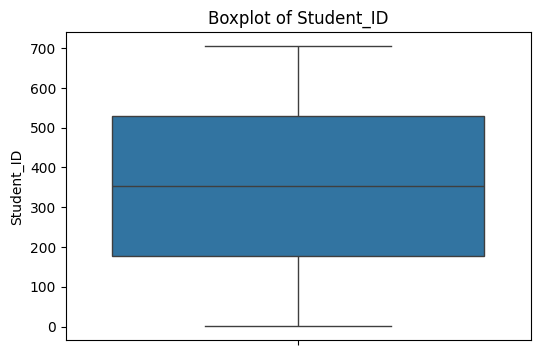

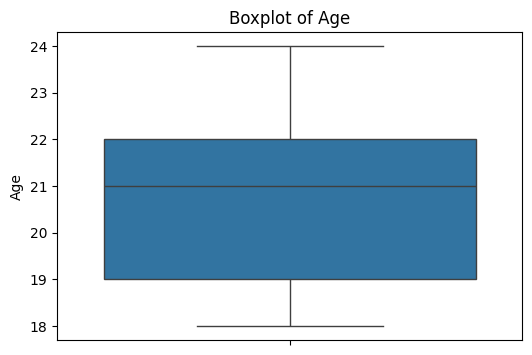

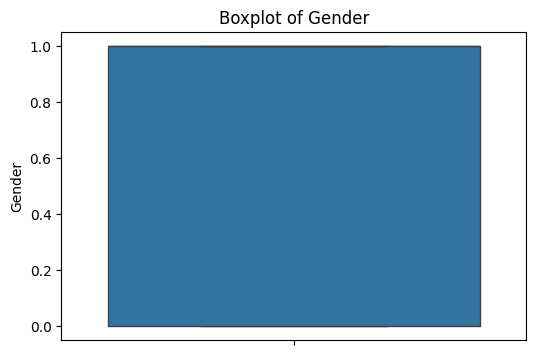

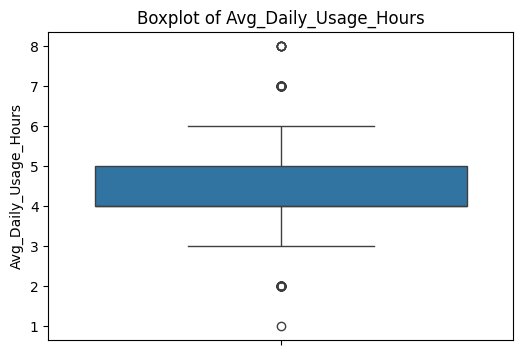

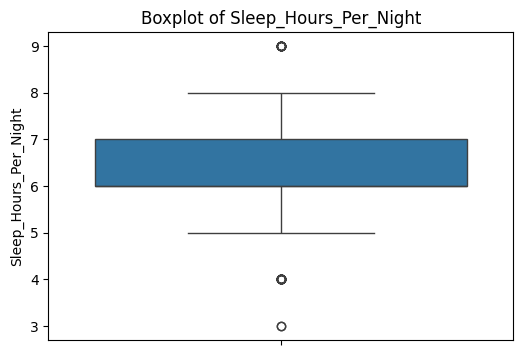

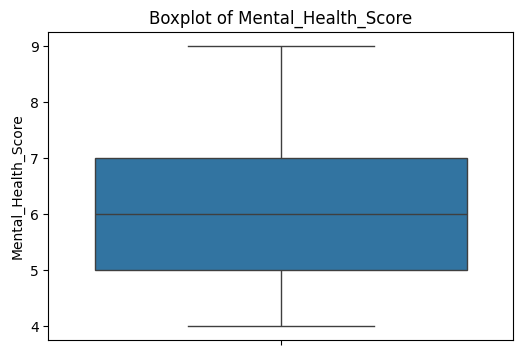

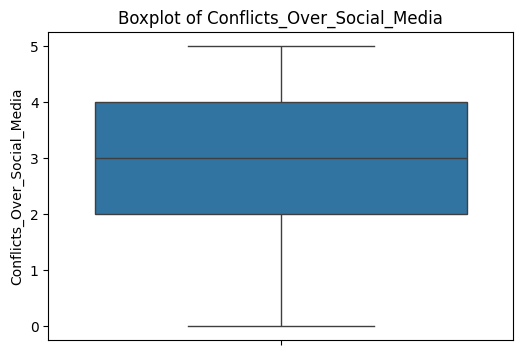

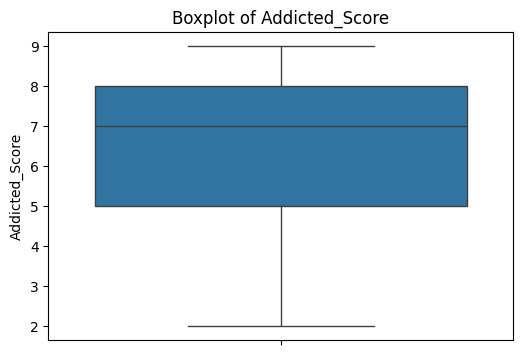

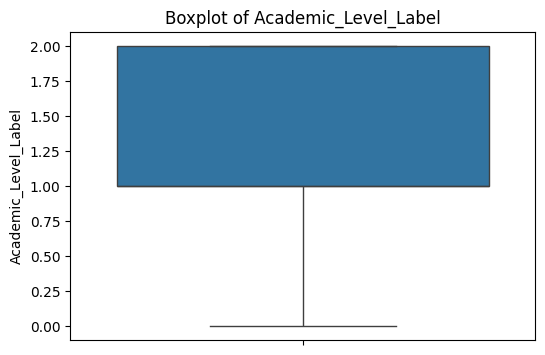

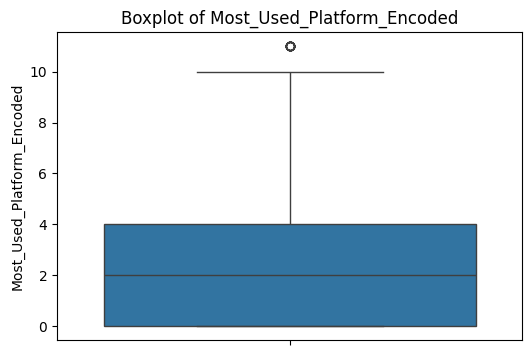

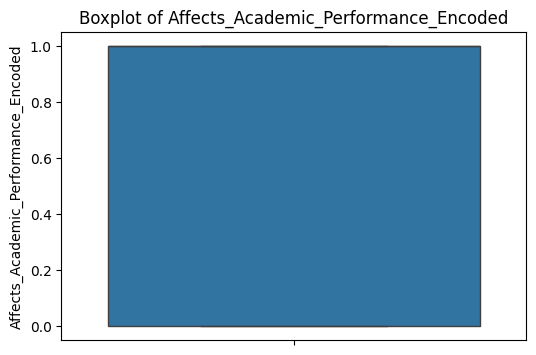

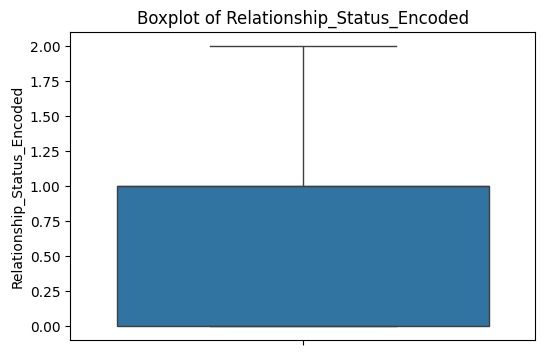

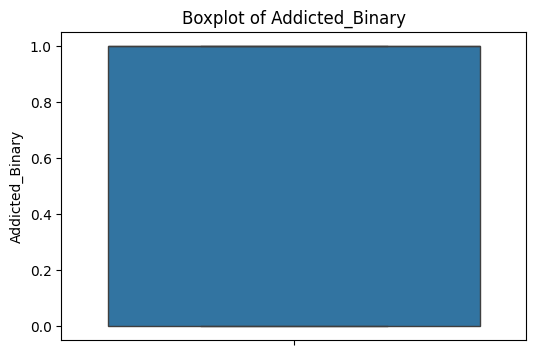

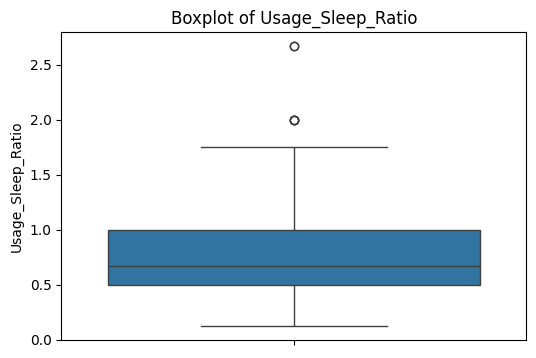

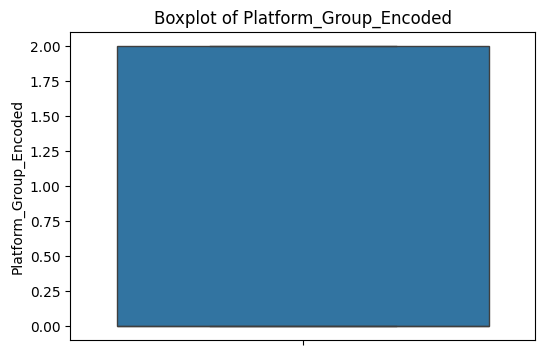


คอลัมน์ Student_ID:
พบ Outliers = 0 แถว

คอลัมน์ Age:
พบ Outliers = 0 แถว

คอลัมน์ Gender:
พบ Outliers = 0 แถว

คอลัมน์ Avg_Daily_Usage_Hours:
พบ Outliers = 88 แถว

คอลัมน์ Sleep_Hours_Per_Night:
พบ Outliers = 45 แถว

คอลัมน์ Mental_Health_Score:
พบ Outliers = 0 แถว

คอลัมน์ Conflicts_Over_Social_Media:
พบ Outliers = 0 แถว

คอลัมน์ Addicted_Score:
พบ Outliers = 0 แถว

คอลัมน์ Academic_Level_Label:
พบ Outliers = 0 แถว

คอลัมน์ Most_Used_Platform_Encoded:
พบ Outliers = 15 แถว

คอลัมน์ Affects_Academic_Performance_Encoded:
พบ Outliers = 0 แถว

คอลัมน์ Relationship_Status_Encoded:
พบ Outliers = 0 แถว

คอลัมน์ Addicted_Binary:
พบ Outliers = 0 แถว

คอลัมน์ Usage_Sleep_Ratio:
พบ Outliers = 6 แถว

คอลัมน์ Platform_Group_Encoded:
พบ Outliers = 0 แถว


In [ ]:
# ตรวจสอบ Outlier ด้วย Boxplot โดยใช้ IQR method

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# หา Outlier ด้วย IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"\nคอลัมน์ {col}:")
    print(f"พบ Outliers = {outliers.shape[0]} แถว")


### **Data Consistency**

In [ ]:
df['Country'].value_counts()

,count
Country,
India,53
USA,40
Canada,34
France,27
Mexico,27
...,...
Oman,1
Afghanistan,1
Syria,1


In [ ]:
# ลบข้อมูลที่ซ้ำในคอลัมน์ 'Country'
unique_countries = df['Country']

# แสดงผลลัพธ์
print(unique_countries)


0      Bangladesh
1           India
2             USA
3              UK
4          Canada
          ...    
700         Italy
701        Russia
702         China
703         Japan
704        Poland
Name: Country, Length: 705, dtype: object


##**Descriptive Statistics**

In [ ]:
# แสดงสถิติ Descriptive Statistics สำหรับทุกคอลัมน์ที่เป็นตัวเลข
print("Descriptive Statistics:")
print(df.describe())

# หาค่า median, mode, skewness, และ kurtosis สำหรับทุกคอลัมน์ที่เป็นตัวเลข
for col in df.select_dtypes(include=['number']).columns:
    print(f"\n{col}:")
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Skewness:", df[col].skew())
    print("Kurtosis:", df[col].kurt())


Descriptive Statistics:
       Student_ID         Age      Gender  Avg_Daily_Usage_Hours  \
count  705.000000  705.000000  705.000000             705.000000   
mean   353.000000   20.659574    0.500709               4.441135   
std    203.660256    1.399217    0.500354               1.292355   
min      1.000000   18.000000    0.000000               1.000000   
25%    177.000000   19.000000    0.000000               4.000000   
50%    353.000000   21.000000    1.000000               4.000000   
75%    529.000000   22.000000    1.000000               5.000000   
max    705.000000   24.000000    1.000000               8.000000   

       Sleep_Hours_Per_Night  Mental_Health_Score  \
count             705.000000           705.000000   
mean                6.418440             6.226950   
std                 1.167481             1.105055   
min                 3.000000             4.000000   
25%                 6.000000             5.000000   
50%                 6.000000             6.00

##**Univariate Analysis**

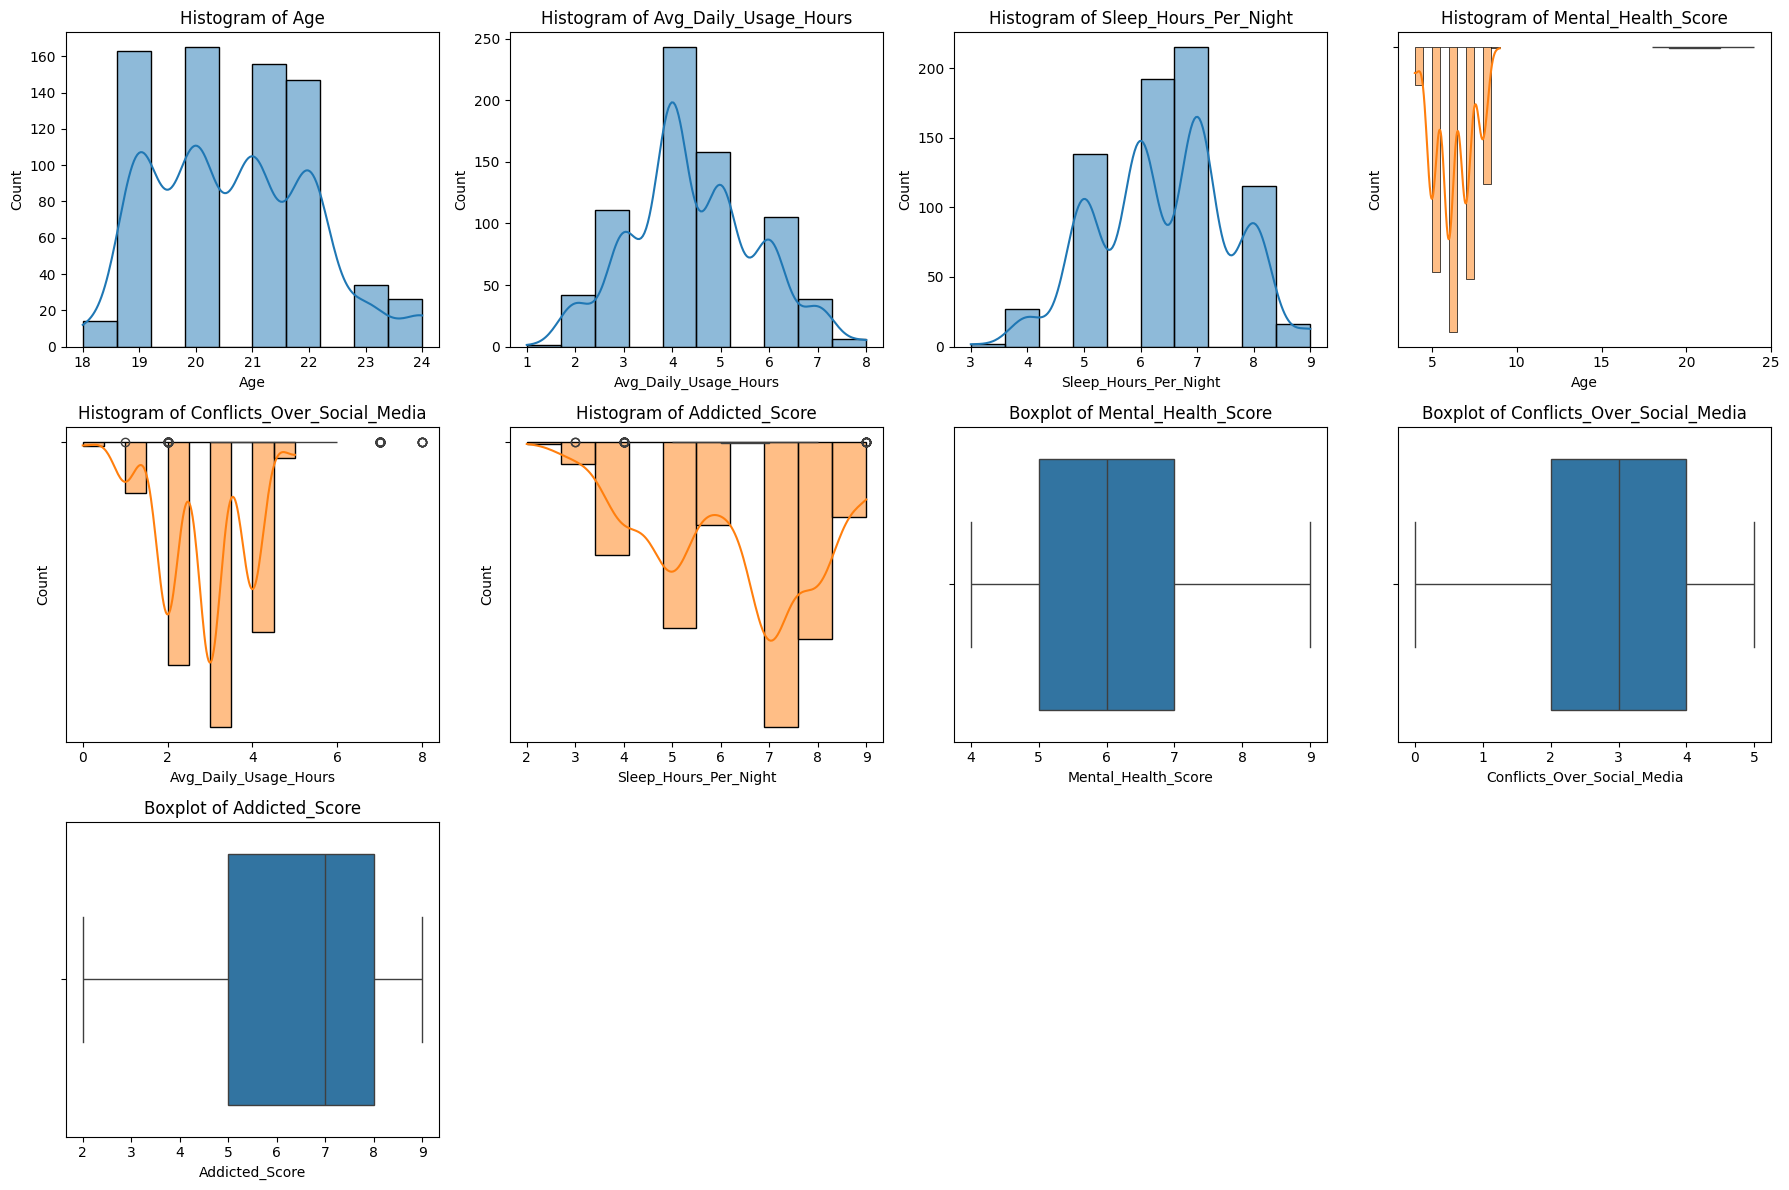

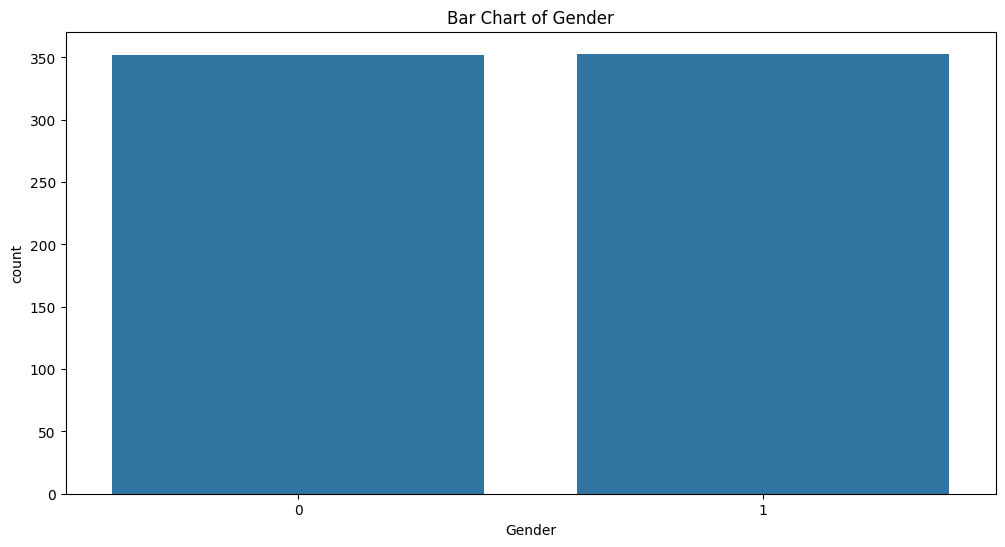

Frequency Table of Gender:
Gender
1    353
0    352
Name: count, dtype: int64




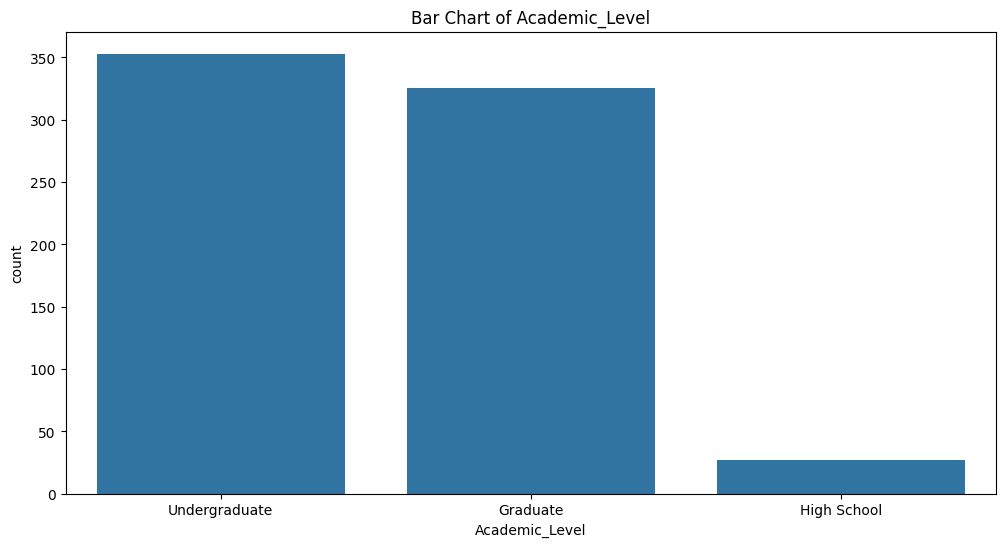

Frequency Table of Academic_Level:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64




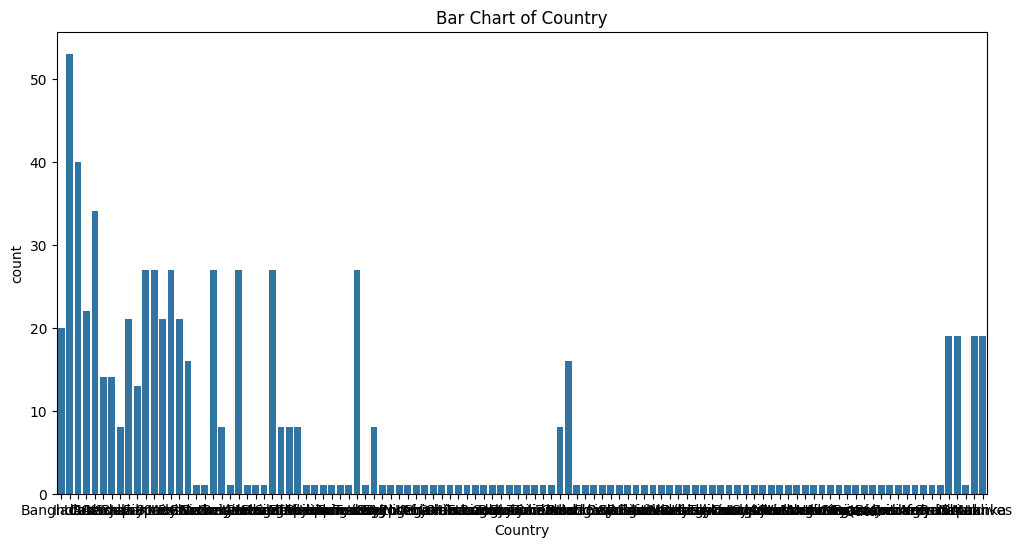

Frequency Table of Country:
Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64




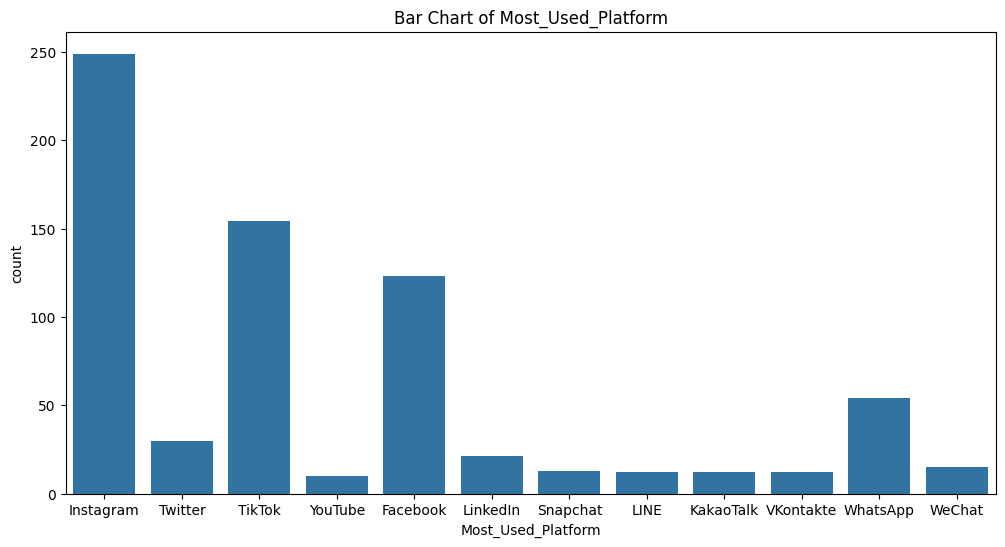

Frequency Table of Most_Used_Platform:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64




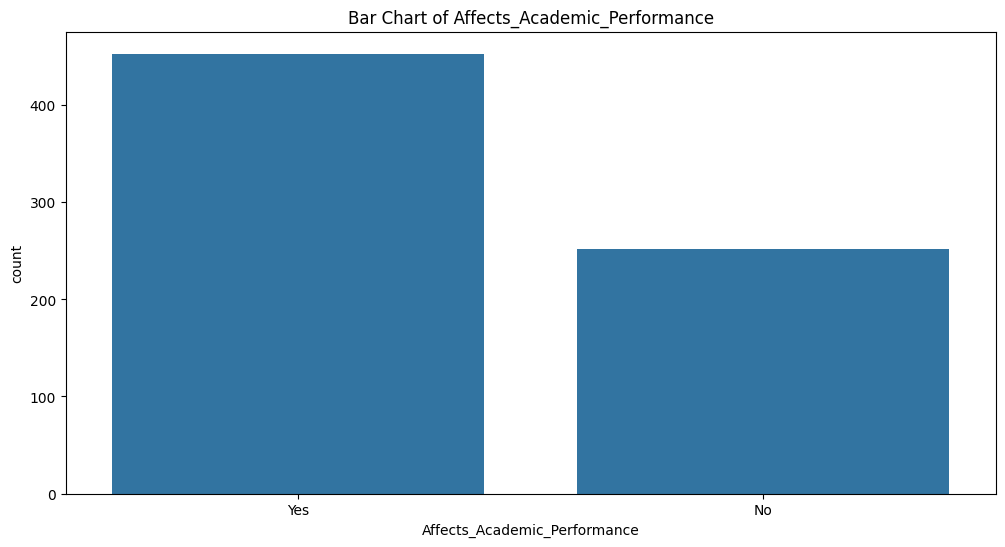

Frequency Table of Affects_Academic_Performance:
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64




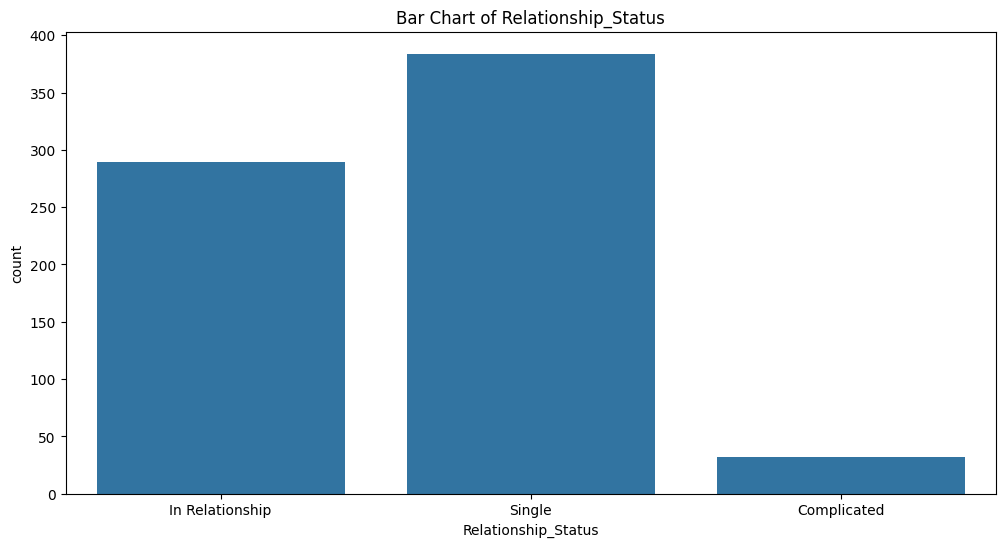

Frequency Table of Relationship_Status:
Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64




In [ ]:
# Numerical Variables


numerical_columns = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                     'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

plt.figure(figsize=(18, 12))

# แสดง Histogram และ Boxplot สำหรับตัวแปรเชิงตัวเลข
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(3, 4, i + 3)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# Categorical Variables

categorical_columns = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                       'Affects_Academic_Performance', 'Relationship_Status']

# แสดง Bar Chart และ Frequency Table สำหรับตัวแปรเชิงหมวดหมู่
for col in categorical_columns:
    plt.figure(figsize=(12, 6))

    # Bar Chart
    sns.countplot(x=df[col])
    plt.title(f"Bar Chart of {col}")
    plt.show()

    # Frequency Table
    print(f"Frequency Table of {col}:")
    print(df[col].value_counts())
    print("\n")


## **Bivariate Analysis**

### Numerical vs Numerical

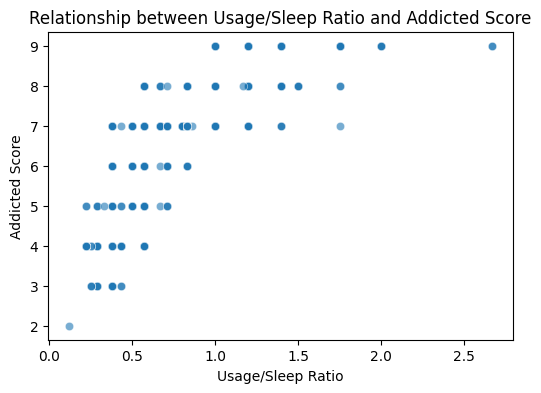

In [ ]:
# Scatterplot: Usage_Sleep_Ratio vs Addicted_Score
plt.figure(figsize=(6,4))
sns.scatterplot(x="Usage_Sleep_Ratio", y="Addicted_Score", data=df, alpha=0.6)
plt.title("Relationship between Usage/Sleep Ratio and Addicted Score")
plt.xlabel("Usage/Sleep Ratio")
plt.ylabel("Addicted Score")
plt.show()

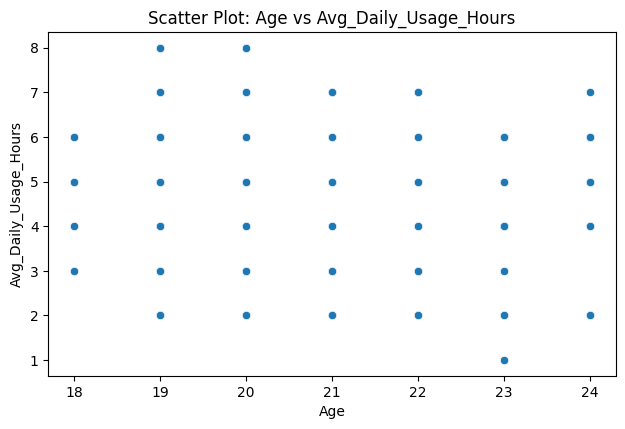

In [ ]:
# Age vs Avg_Daily_Usage_Hours
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)
sns.scatterplot(x=df['Age'], y=df['Avg_Daily_Usage_Hours'])
plt.title('Scatter Plot: Age vs Avg_Daily_Usage_Hours')
plt.tight_layout()
plt.show()

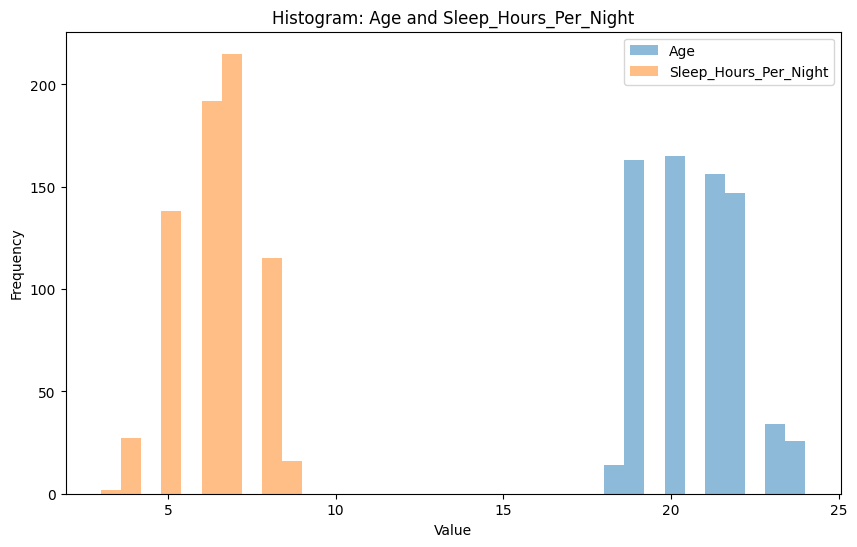

In [ ]:
# Age vs Sleep_Hours_Per_Night
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, alpha=0.5, label='Age')
plt.hist(df['Sleep_Hours_Per_Night'], bins=10, alpha=0.5, label='Sleep_Hours_Per_Night')
plt.title('Histogram: Age and Sleep_Hours_Per_Night')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


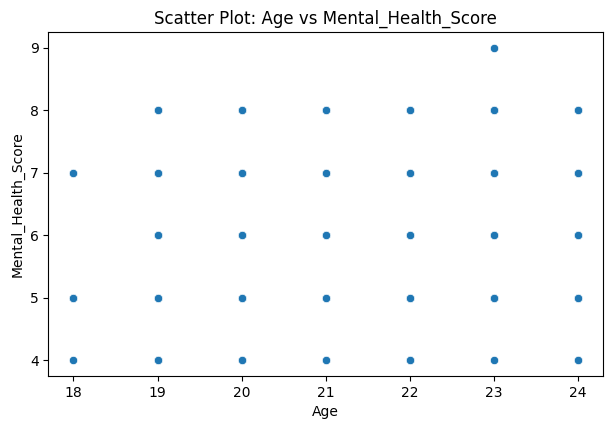

In [ ]:
# Age vs Mental_Health_Score
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 3)
sns.scatterplot(x=df['Age'], y=df['Mental_Health_Score'])
plt.title('Scatter Plot: Age vs Mental_Health_Score')
plt.tight_layout()
plt.show()

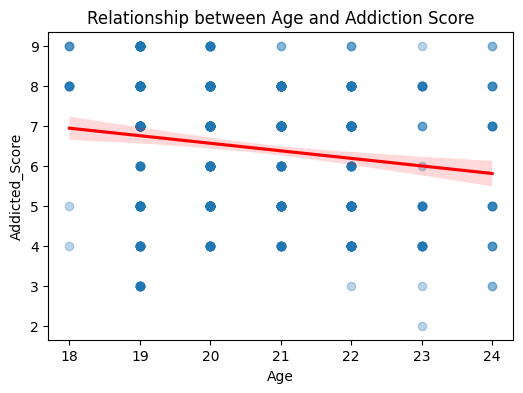

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(data=df, x="Age", y="Addicted_Score", scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("Relationship between Age and Addiction Score")
plt.show()


อายุที่มากขึ้นสัมพันธ์กับ Addiction Score ที่ลดลง (ความสัมพันธ์เชิงลบ) โดยเส้นแดงมีความชัน ติดลบเล็กน้อยแสดงว่า อายุที่มากขึ้น มีแนวโน้มให้ Addiction Score ลดลงเล็กน้อย

### Categorical vs Numerical

In [ ]:
print(df.columns.tolist())


['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score', 'Academic_Level_Label', 'Most_Used_Platform_Encoded', 'Affects_Academic_Performance_Encoded', 'Relationship_Status_Encoded', 'Addicted_Binary', 'Sleep_Category', 'Usage_Sleep_Ratio', 'Platform_Group', 'Platform_Group_Encoded']


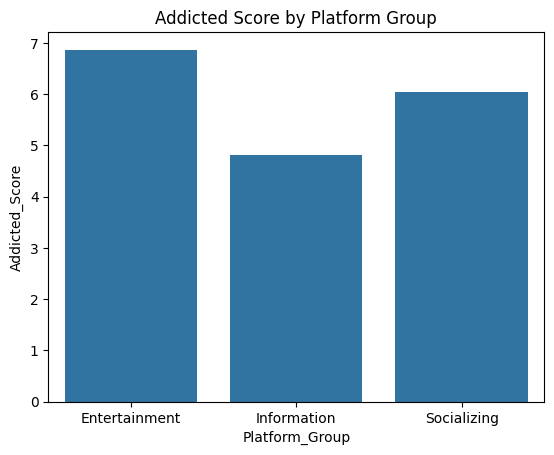

In [ ]:
# Barplot ดู Platform_Group vs Addicted_Score (เพื่อดูว่าค่าเฉลี่ยการติดในแต่ละ Platform Group ต่างกันหรือไม่)
sns.barplot(x="Platform_Group", y="Addicted_Score", data=df , errorbar=None)
plt.title("Addicted Score by Platform Group")
plt.show()


/tmp/ipython-input-548394068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sleep_Category", y="Addicted_Score", data=df, palette="Set2" , errorbar=None)


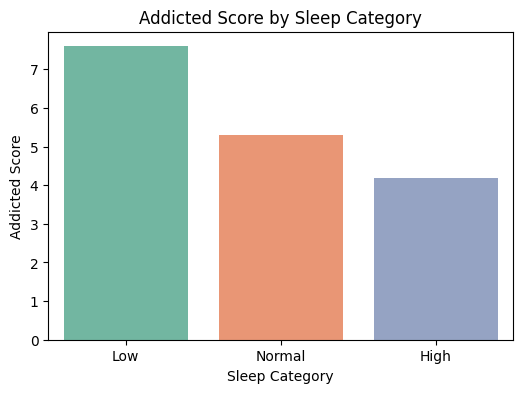

In [ ]:
# Barplot: ความสัมพันธ์ระหว่าง Sleep_Category กับ Addicted_Score
plt.figure(figsize=(6,4))
sns.barplot(x="Sleep_Category", y="Addicted_Score", data=df, palette="Set2" , errorbar=None)
plt.title("Addicted Score by Sleep Category")
plt.xlabel("Sleep Category")
plt.ylabel("Addicted Score")
plt.show()

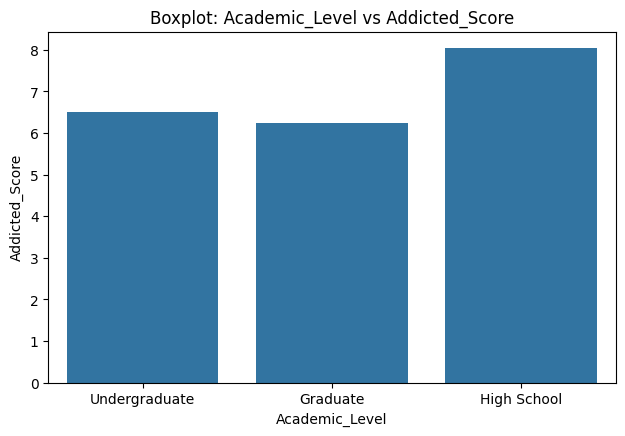

In [ ]:
# Academic_Level vs Addicted_Score
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 4)
sns.barplot(x=df['Academic_Level'], y=df['Addicted_Score'], errorbar=None)
plt.title('Boxplot: Academic_Level vs Addicted_Score')
plt.tight_layout()
plt.show()

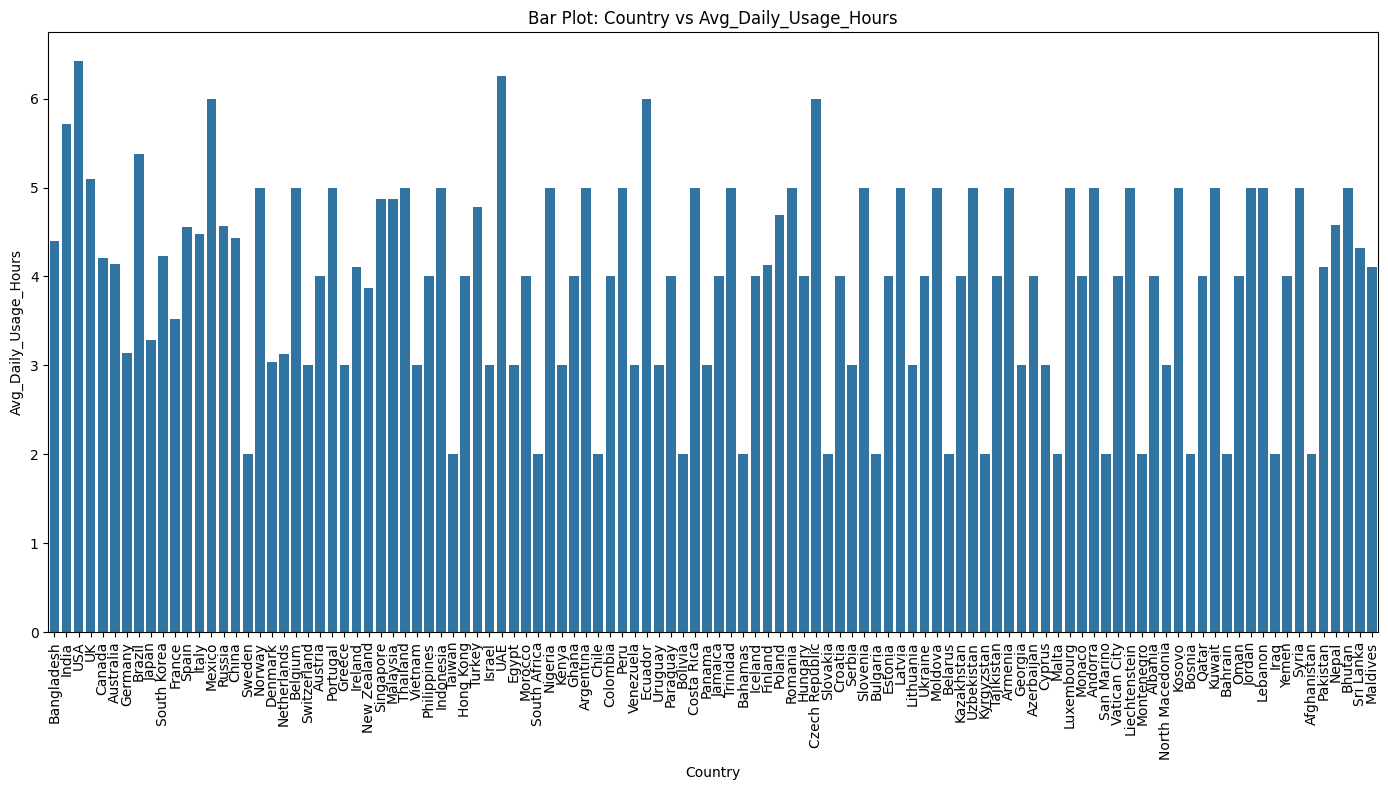

In [ ]:
# กำหนดขนาดของกราฟ
plt.figure(figsize=(14, 8))  # ปรับขนาดให้เหมาะสม

# Bar Plot (แสดงค่าเฉลี่ย)
sns.barplot(x=df['Country'], y=df['Avg_Daily_Usage_Hours'], errorbar=None ,estimator='mean')

# กำหนดชื่อกราฟ
plt.title('Bar Plot: Country vs Avg_Daily_Usage_Hours')

# หมุนชื่อของแกน x ให้ดูง่ายขึ้น
plt.xticks(rotation=90)

# แสดงกราฟ
plt.tight_layout()
plt.show()


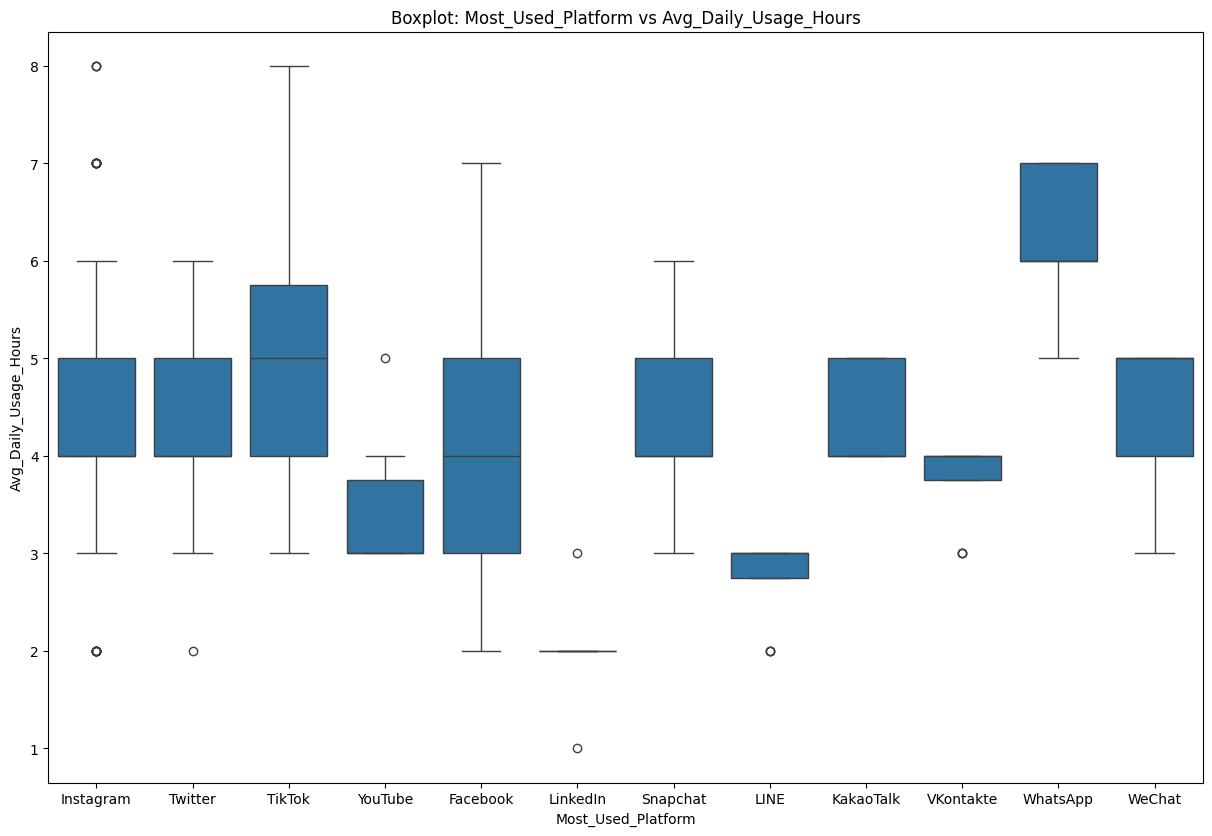

In [ ]:
# Most_Used_Platform vs Avg_Daily_Usage_Hours
plt.figure(figsize=(36, 24))
plt.subplot(3, 3, 6)
sns.boxplot(x=df['Most_Used_Platform'], y=df['Avg_Daily_Usage_Hours'])
plt.title('Boxplot: Most_Used_Platform vs Avg_Daily_Usage_Hours')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2660402827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender", y="Addicted_Score", palette="Set2")


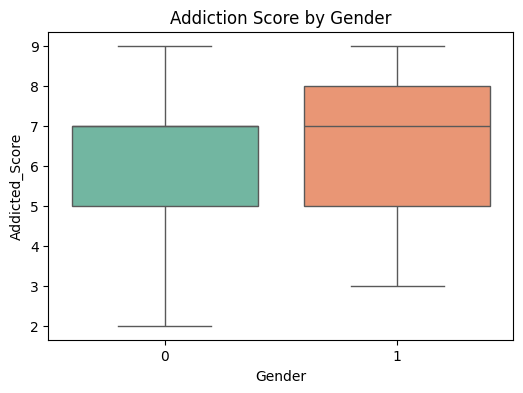

In [ ]:
# Gender vs Addicted_Score
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Gender", y="Addicted_Score", palette="Set2")
plt.title("Addiction Score by Gender")
plt.show()

- Female มีค่า median สูงกว่า Male โดยเฉลี่ยผู้หญิงมีแนวโน้มติดโซเชียลมากกว่า
- ทั้งสองเพศมีการกระจายคะแนนกว้าง (ตั้งแต่ ~2 ถึง 9) แสดงว่ามีทั้งคนที่ติดน้อยและติดมากในทุกเพศ
แต่ Female มีการกระจายช่วงบน (upper quartile) สูงกว่า Male

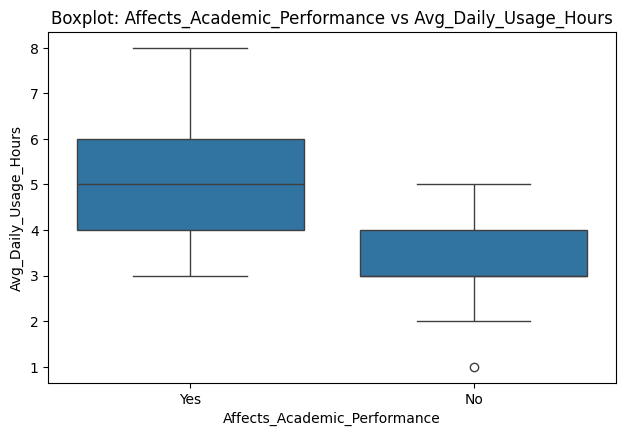

In [ ]:
# Affects_Academic_Performance vs Avg_Daily_Usage_Hours
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 7)
sns.boxplot(x=df['Affects_Academic_Performance'], y=df['Avg_Daily_Usage_Hours'])
plt.title('Boxplot: Affects_Academic_Performance vs Avg_Daily_Usage_Hours')
plt.tight_layout()
plt.show()

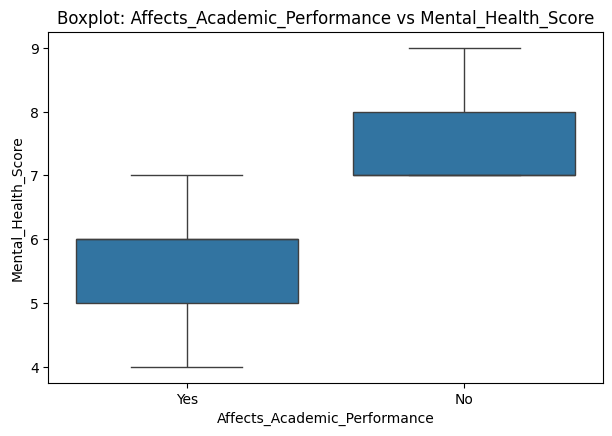

In [ ]:
# Affects_Academic_Performance vs Mental_Health_Score
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 8)
sns.boxplot(x=df['Affects_Academic_Performance'], y=df['Mental_Health_Score'])
plt.title('Boxplot: Affects_Academic_Performance vs Mental_Health_Score')
plt.tight_layout()
plt.show()

### Categorical vs Categorical

Crosstab (Count):
 Affects_Academic_Performance   No  Yes
Gender                                
0                             130  222
1                             122  231

Crosstab (Percent):
 Affects_Academic_Performance         No        Yes
Gender                                            
0                             36.931818  63.068182
1                             34.560907  65.439093


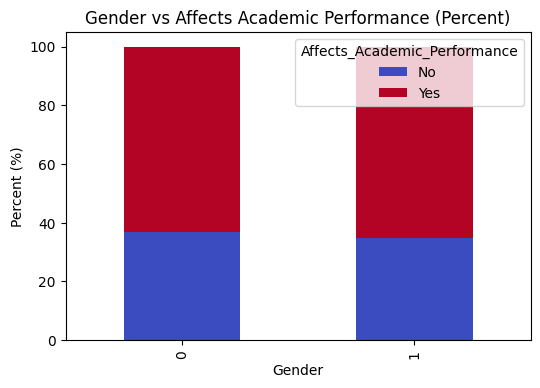

In [ ]:
# Gender vs Affects_Academic_Performance
table = pd.crosstab(df["Gender"], df["Affects_Academic_Performance"])
print("Crosstab (Count):\n", table)
print("\nCrosstab (Percent):\n", pd.crosstab(df["Gender"], df["Affects_Academic_Performance"], normalize="index")*100)

# Stacked bar
(pd.crosstab(df["Gender"], df["Affects_Academic_Performance"], normalize="index")*100).plot(
    kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")
plt.title("Gender vs Affects Academic Performance (Percent)")
plt.ylabel("Percent (%)")
plt.show()


Gender vs Affects_Academic_Performance
- เพศ Female ส่วนใหญ่ตอบว่า 'Yes' (65.4%)
- เพศ Male ส่วนใหญ่ตอบว่า 'Yes' (63.1%)

Crosstab (Count):
 Relationship_Status  Complicated  In Relationship  Single
Academic_Level                                           
Graduate                       5              163     157
High School                    9                6      12
Undergraduate                 18              120     215

Crosstab (Percent):
 Relationship_Status  Complicated  In Relationship     Single
Academic_Level                                              
Graduate                1.538462        50.153846  48.307692
High School            33.333333        22.222222  44.444444
Undergraduate           5.099150        33.994334  60.906516


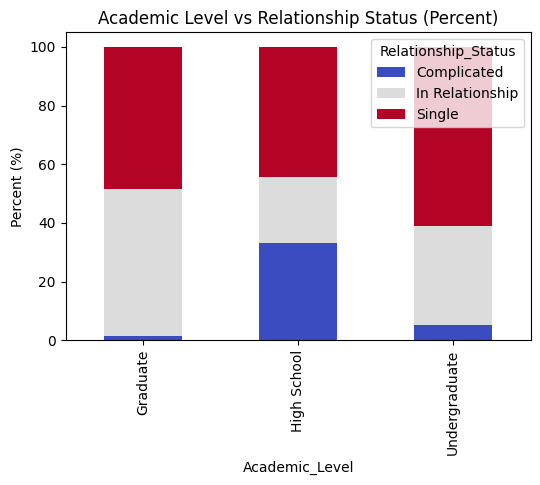

In [ ]:
# Academic Level vs Relationship Status
table = pd.crosstab(df["Academic_Level"], df["Relationship_Status"])
print("Crosstab (Count):\n", table)
print("\nCrosstab (Percent):\n", pd.crosstab(df["Academic_Level"], df["Relationship_Status"], normalize="index")*100)

# Stacked bar
(pd.crosstab(df["Academic_Level"], df["Relationship_Status"], normalize="index")*100).plot(
    kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")
plt.title("Academic Level vs Relationship Status (Percent)")
plt.ylabel("Percent (%)")
plt.show()


Academic Level vs Relationship Status
- กลุ่ม Graduate ส่วนใหญ่มีสถานะความสัมพันธ์เป็น 'In Relationship' (50.2%)
- กลุ่ม High School ส่วนใหญ่มีสถานะความสัมพันธ์เป็น 'Single' (44.4%)
- กลุ่ม Undergraduate ส่วนใหญ่มีสถานะความสัมพันธ์เป็น 'Single' (60.9%)

Crosstab (Count):
 Gender               0    1
Most_Used_Platform         
Facebook            99   24
Instagram           77  172
KakaoTalk            0   12
LINE                 0   12
LinkedIn            13    8
Snapchat             5    8
TikTok              68   86
Twitter             14   16
VKontakte           12    0
WeChat              11    4
WhatsApp            43   11
YouTube             10    0

Crosstab (Percent):
 Gender                       0           1
Most_Used_Platform                        
Facebook             80.487805   19.512195
Instagram            30.923695   69.076305
KakaoTalk             0.000000  100.000000
LINE                  0.000000  100.000000
LinkedIn             61.904762   38.095238
Snapchat             38.461538   61.538462
TikTok               44.155844   55.844156
Twitter              46.666667   53.333333
VKontakte           100.000000    0.000000
WeChat               73.333333   26.666667
WhatsApp             79.629630   20.370370
YouTube 

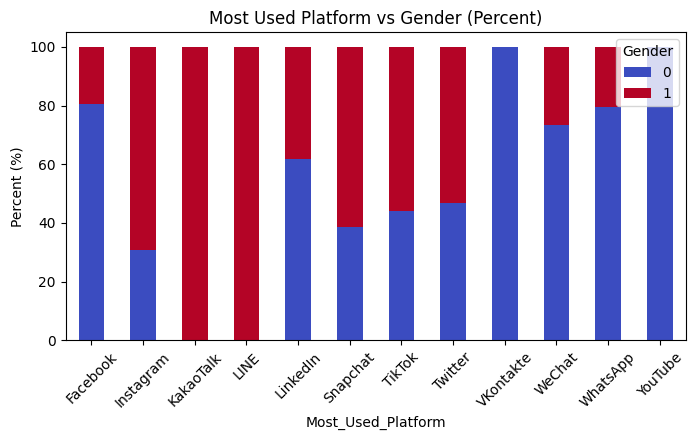

In [ ]:
# Most Used Platform vs Gender
table = pd.crosstab(df["Most_Used_Platform"], df["Gender"])
print("Crosstab (Count):\n", table)
print("\nCrosstab (Percent):\n", pd.crosstab(df["Most_Used_Platform"], df["Gender"], normalize="index")*100)

# Stacked bar
(pd.crosstab(df["Most_Used_Platform"], df["Gender"], normalize="index")*100).plot(
    kind="bar", stacked=True, figsize=(8,4), colormap="coolwarm")
plt.title("Most Used Platform vs Gender (Percent)")
plt.ylabel("Percent (%)")
plt.xticks(rotation=45)
plt.show()

Most Used Platform vs Gender
- แพลตฟอร์ม Facebook ผู้ใช้งานส่วนใหญ่คือเพศ Male (80.5%)
- แพลตฟอร์ม Instagram ผู้ใช้งานส่วนใหญ่คือเพศ Female (69.1%)
- แพลตฟอร์ม KakaoTalk ผู้ใช้งานส่วนใหญ่คือเพศ Female (100.0%)
- แพลตฟอร์ม LINE ผู้ใช้งานส่วนใหญ่คือเพศ Female (100.0%)
- แพลตฟอร์ม LinkedIn ผู้ใช้งานส่วนใหญ่คือเพศ Male (61.9%)
- แพลตฟอร์ม Snapchat ผู้ใช้งานส่วนใหญ่คือเพศ Female (61.5%)
- แพลตฟอร์ม TikTok ผู้ใช้งานส่วนใหญ่คือเพศ Female (55.8%)
- แพลตฟอร์ม Twitter ผู้ใช้งานส่วนใหญ่คือเพศ Female (53.3%)
- แพลตฟอร์ม VKontakte ผู้ใช้งานส่วนใหญ่คือเพศ Male (100.0%)
- แพลตฟอร์ม WeChat ผู้ใช้งานส่วนใหญ่คือเพศ Male (73.3%)
- แพลตฟอร์ม WhatsApp ผู้ใช้งานส่วนใหญ่คือเพศ Male (79.6%)
- แพลตฟอร์ม YouTube ผู้ใช้งานส่วนใหญ่คือเพศ Male (100.0%)

Crosstab (Count):
 Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Academic_Level                                                                 
Graduate                  87         82          0     0        21         0   
High School                0         12          0     0         0         5   
Undergraduate             36        155         12    12         0         8   

Most_Used_Platform  TikTok  Twitter  VKontakte  WeChat  WhatsApp  YouTube  
Academic_Level                                                             
Graduate                51       17         12      12        43        0  
High School              8        0          0       0         0        2  
Undergraduate           95       13          0       3        11        8  

Crosstab (Percent by Academic_Level):
 Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Academic_Level                                                                 


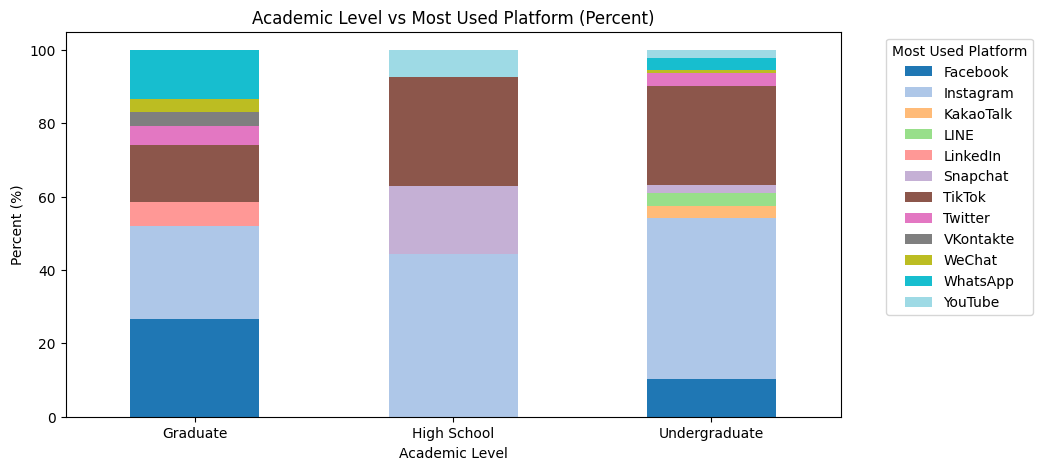

In [ ]:
# Academic_Level vs Most_Used_Platform

# Crosstab (นับจำนวนจริง)
table = pd.crosstab(df["Academic_Level"], df["Most_Used_Platform"])
print("Crosstab (Count):\n", table)

# Crosstab (สัดส่วน % ในแต่ละ Academic Level)
table_pct = pd.crosstab(df["Academic_Level"], df["Most_Used_Platform"], normalize="index") * 100
print("\nCrosstab (Percent by Academic_Level):\n", table_pct.round(1))

# Stacked Bar Chart
table_pct.plot(kind="bar", stacked=True, figsize=(10,5), colormap="tab20")
plt.title("Academic Level vs Most Used Platform (Percent)")
plt.ylabel("Percent (%)")
plt.xlabel("Academic Level")
plt.xticks(rotation=0)
plt.legend(title="Most Used Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Academic Level vs Most Used Platform
- ระดับ Graduate นิยมใช้แพลตฟอร์ม 'Facebook' มากที่สุด (26.8%)
- ระดับ High School นิยมใช้แพลตฟอร์ม 'Instagram' มากที่สุด (44.4%)
- ระดับ Undergraduate นิยมใช้แพลตฟอร์ม 'Instagram' มากที่สุด (43.9%)

## Multivariate Analysis

### Correlation Matrix + Heatmap

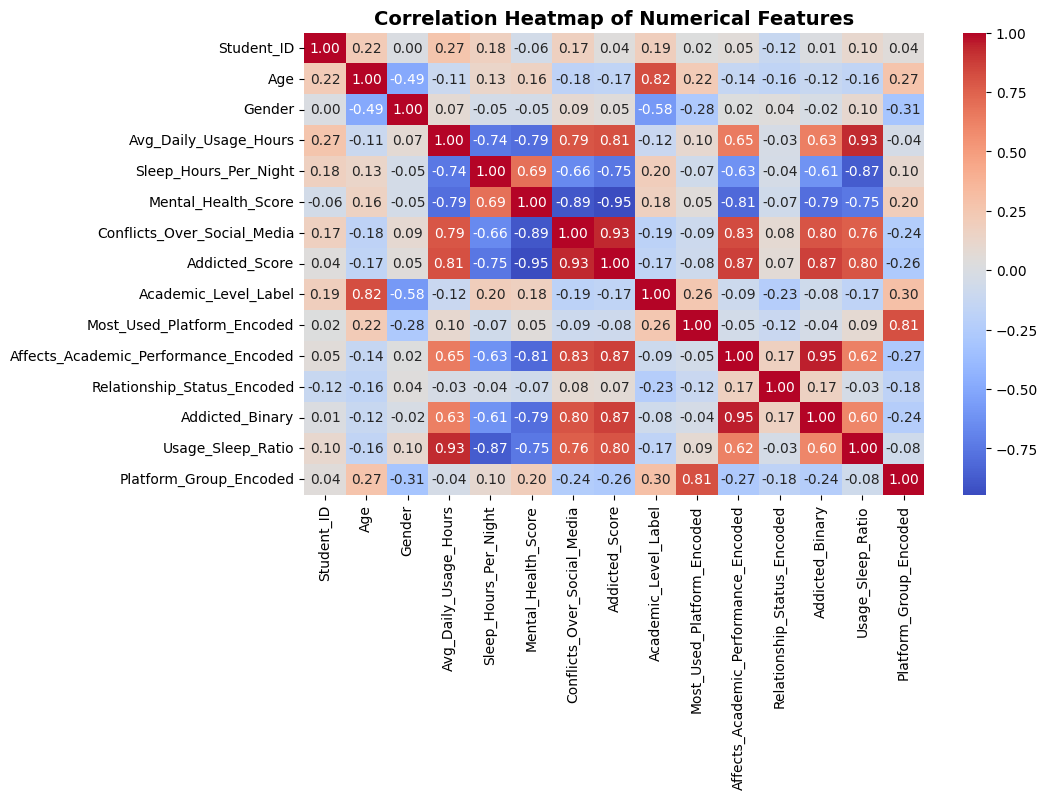

In [ ]:
# เลือกเฉพาะ numerical columns
num_df = df.select_dtypes(include=["int64","float64"])

# สร้าง Correlation Matrix
corr = num_df.corr()

# วาด Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")
plt.show()



### Pairplot (Seaborn)

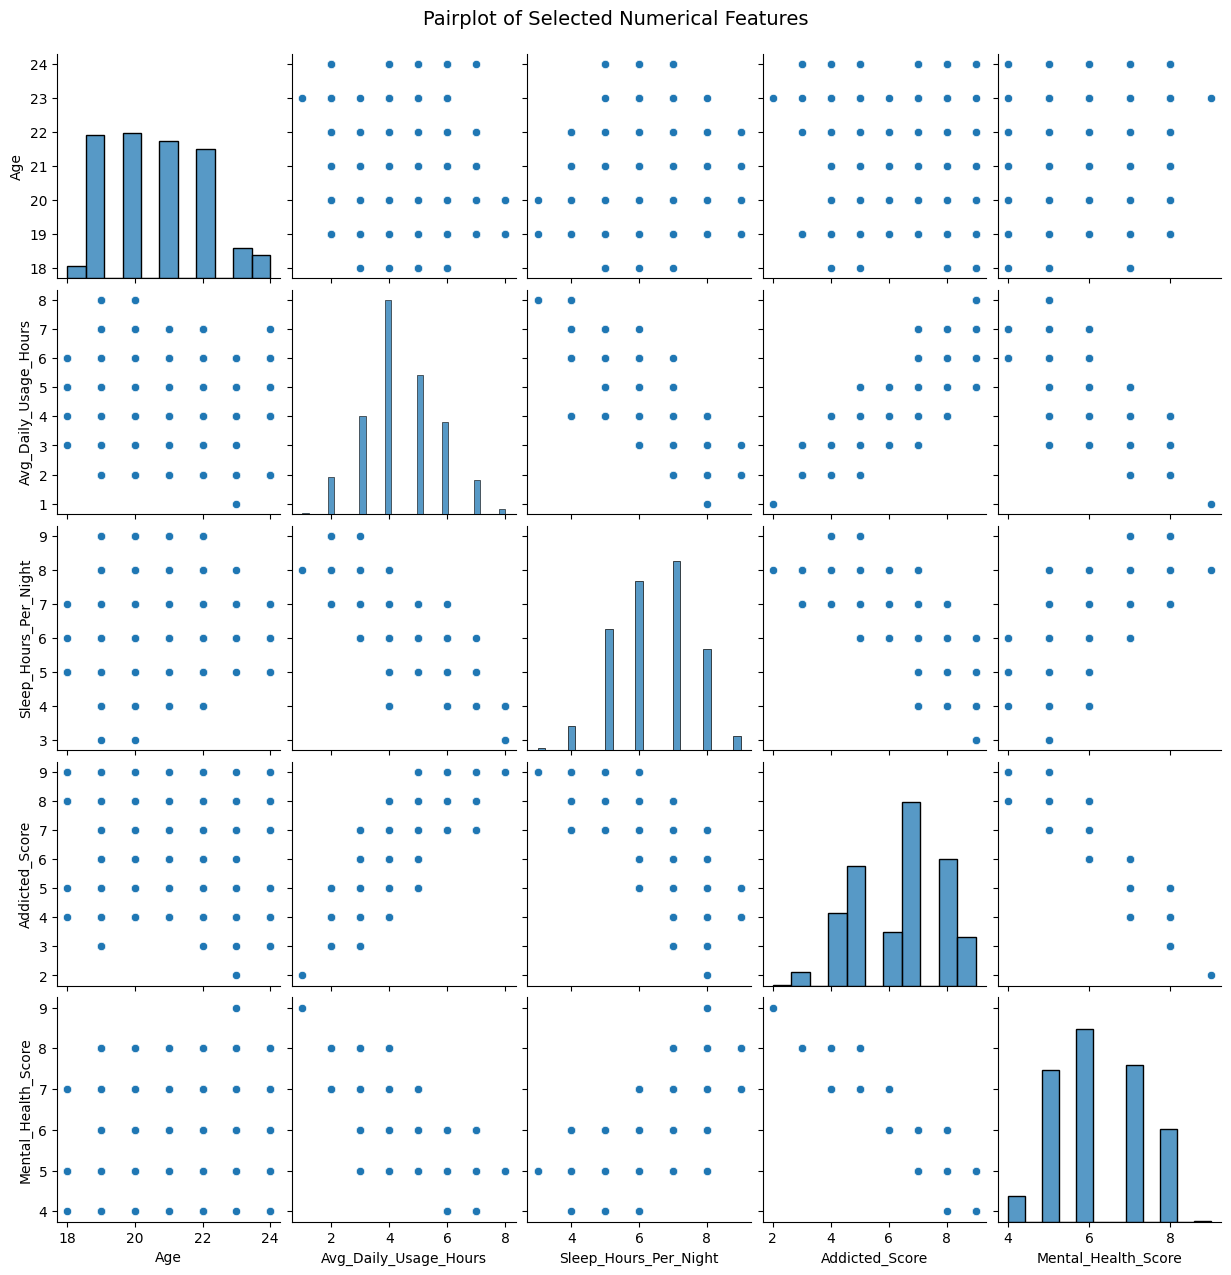

In [ ]:
# เลือกเฉพาะ numerical columns ที่น่าสนใจ
cols = ["Age", "Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night",
        "Addicted_Score", "Mental_Health_Score"]

# Pairplot พื้นฐาน
sns.pairplot(df[cols], diag_kind="hist", corner=False)
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02, fontsize=14)
plt.show()

### Group by Academic Level

Group by Academic Level + Gender:

  Academic_Level  Gender  Addicted_Score  Avg_Daily_Usage_Hours  \
0       Graduate       0            6.27                   4.33   
1       Graduate       1            6.10                   4.21   
2    High School       0            7.50                   4.75   
3    High School       1            8.47                   5.33   
4  Undergraduate       0            6.54                   4.35   
5  Undergraduate       1            6.48                   4.55   

   Sleep_Hours_Per_Night  
0                   6.62  
1                   6.40  
2                   5.25  
3                   5.00  
4                   6.03  
5                   6.43  


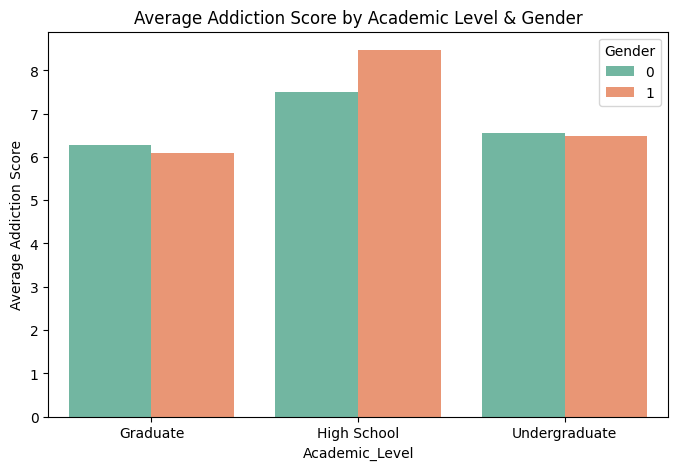

In [ ]:
# Group by Academic Level + Gender
agg_result = df.groupby(["Academic_Level", "Gender"]).agg({
    "Addicted_Score": "mean",
    "Avg_Daily_Usage_Hours": "mean",
    "Sleep_Hours_Per_Night": "mean"
}).round(2).reset_index()

print("Group by Academic Level + Gender:\n")
print(agg_result)

# แสดงผลเป็น Barplot
plt.figure(figsize=(8,5))
sns.barplot(data=agg_result, x="Academic_Level", y="Addicted_Score", hue="Gender", palette="Set2")
plt.title("Average Addiction Score by Academic Level & Gender")
plt.ylabel("Average Addiction Score")
plt.show()


## Pattern & Trend Detection

### Segmentation (การแบ่งกลุ่ม)

/tmp/ipython-input-1551600238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seg_academic, x="Academic_Level", y="Addicted_Score", palette="Set2")


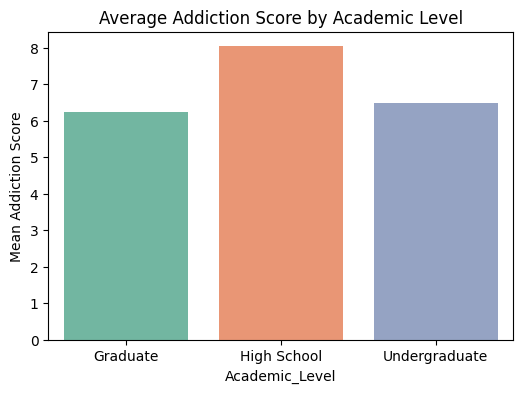

In [ ]:
# Segmentation ตาม Academic Level
# Bar Chart ค่า Addiction Score เฉลี่ยตาม Academic Level

seg_academic = df.groupby("Academic_Level")["Addicted_Score"].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=seg_academic, x="Academic_Level", y="Addicted_Score", palette="Set2")
plt.title("Average Addiction Score by Academic Level")
plt.ylabel("Mean Addiction Score")
plt.show()


/tmp/ipython-input-153957179.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seg_gender, x="Gender", y="Addicted_Score", palette="Set1", ax=ax1)


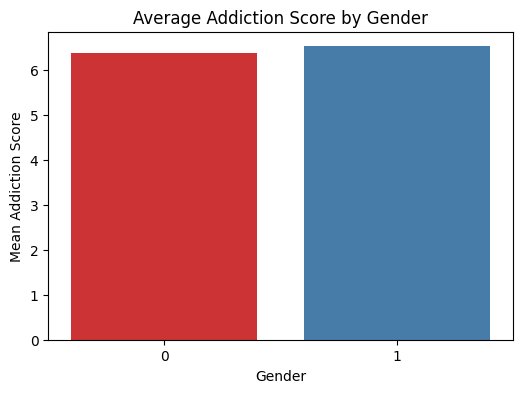

/tmp/ipython-input-153957179.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seg_gender, x="Gender", y="Avg_Daily_Usage_Hours", palette="Set1")


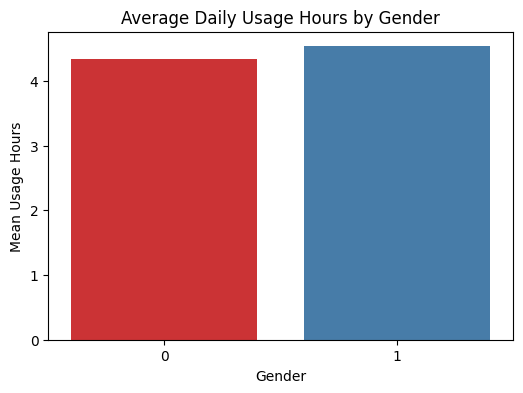

In [ ]:
# Segmentation ตาม Gender
# Bar Chart ค่า Addiction Score และ Usage Hours เฉลี่ยตาม Gender

seg_gender = df.groupby("Gender")[["Addicted_Score","Avg_Daily_Usage_Hours"]].mean().reset_index()
fig, ax1 = plt.subplots(figsize=(6,4))
sns.barplot(data=seg_gender, x="Gender", y="Addicted_Score", palette="Set1", ax=ax1)
plt.title("Average Addiction Score by Gender")
plt.ylabel("Mean Addiction Score")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=seg_gender, x="Gender", y="Avg_Daily_Usage_Hours", palette="Set1")
plt.title("Average Daily Usage Hours by Gender")
plt.ylabel("Mean Usage Hours")
plt.show()


/tmp/ipython-input-1146304328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seg_platform, x="Most_Used_Platform", y="Addicted_Score", palette="viridis")


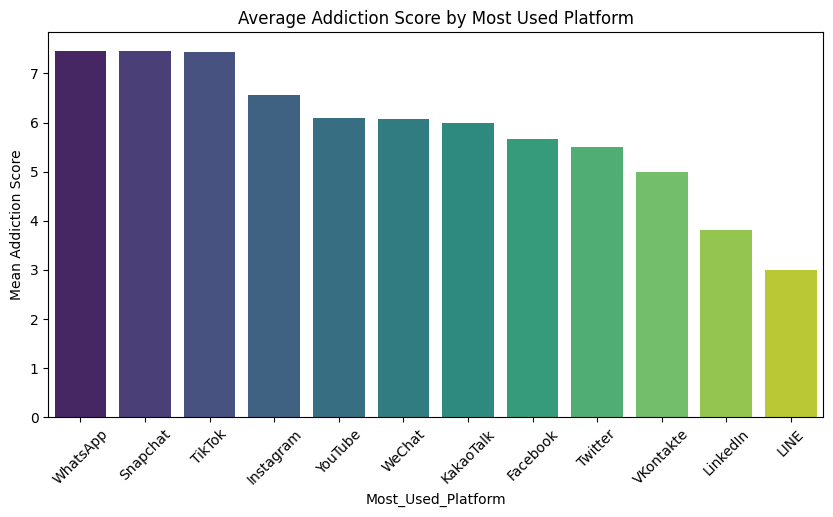

In [ ]:
# Segmentation ตาม Most Used Platform
# Bar Chart ค่า Addiction Score เฉลี่ยตาม Most Used Platform
seg_platform = df.groupby("Most_Used_Platform")["Addicted_Score"].mean().reset_index().sort_values(by="Addicted_Score", ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=seg_platform, x="Most_Used_Platform", y="Addicted_Score", palette="viridis")
plt.title("Average Addiction Score by Most Used Platform")
plt.xticks(rotation=45)
plt.ylabel("Mean Addiction Score")
plt.show()


/tmp/ipython-input-2242588366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seg_country, x="Country", y="Addicted_Score", palette="coolwarm")


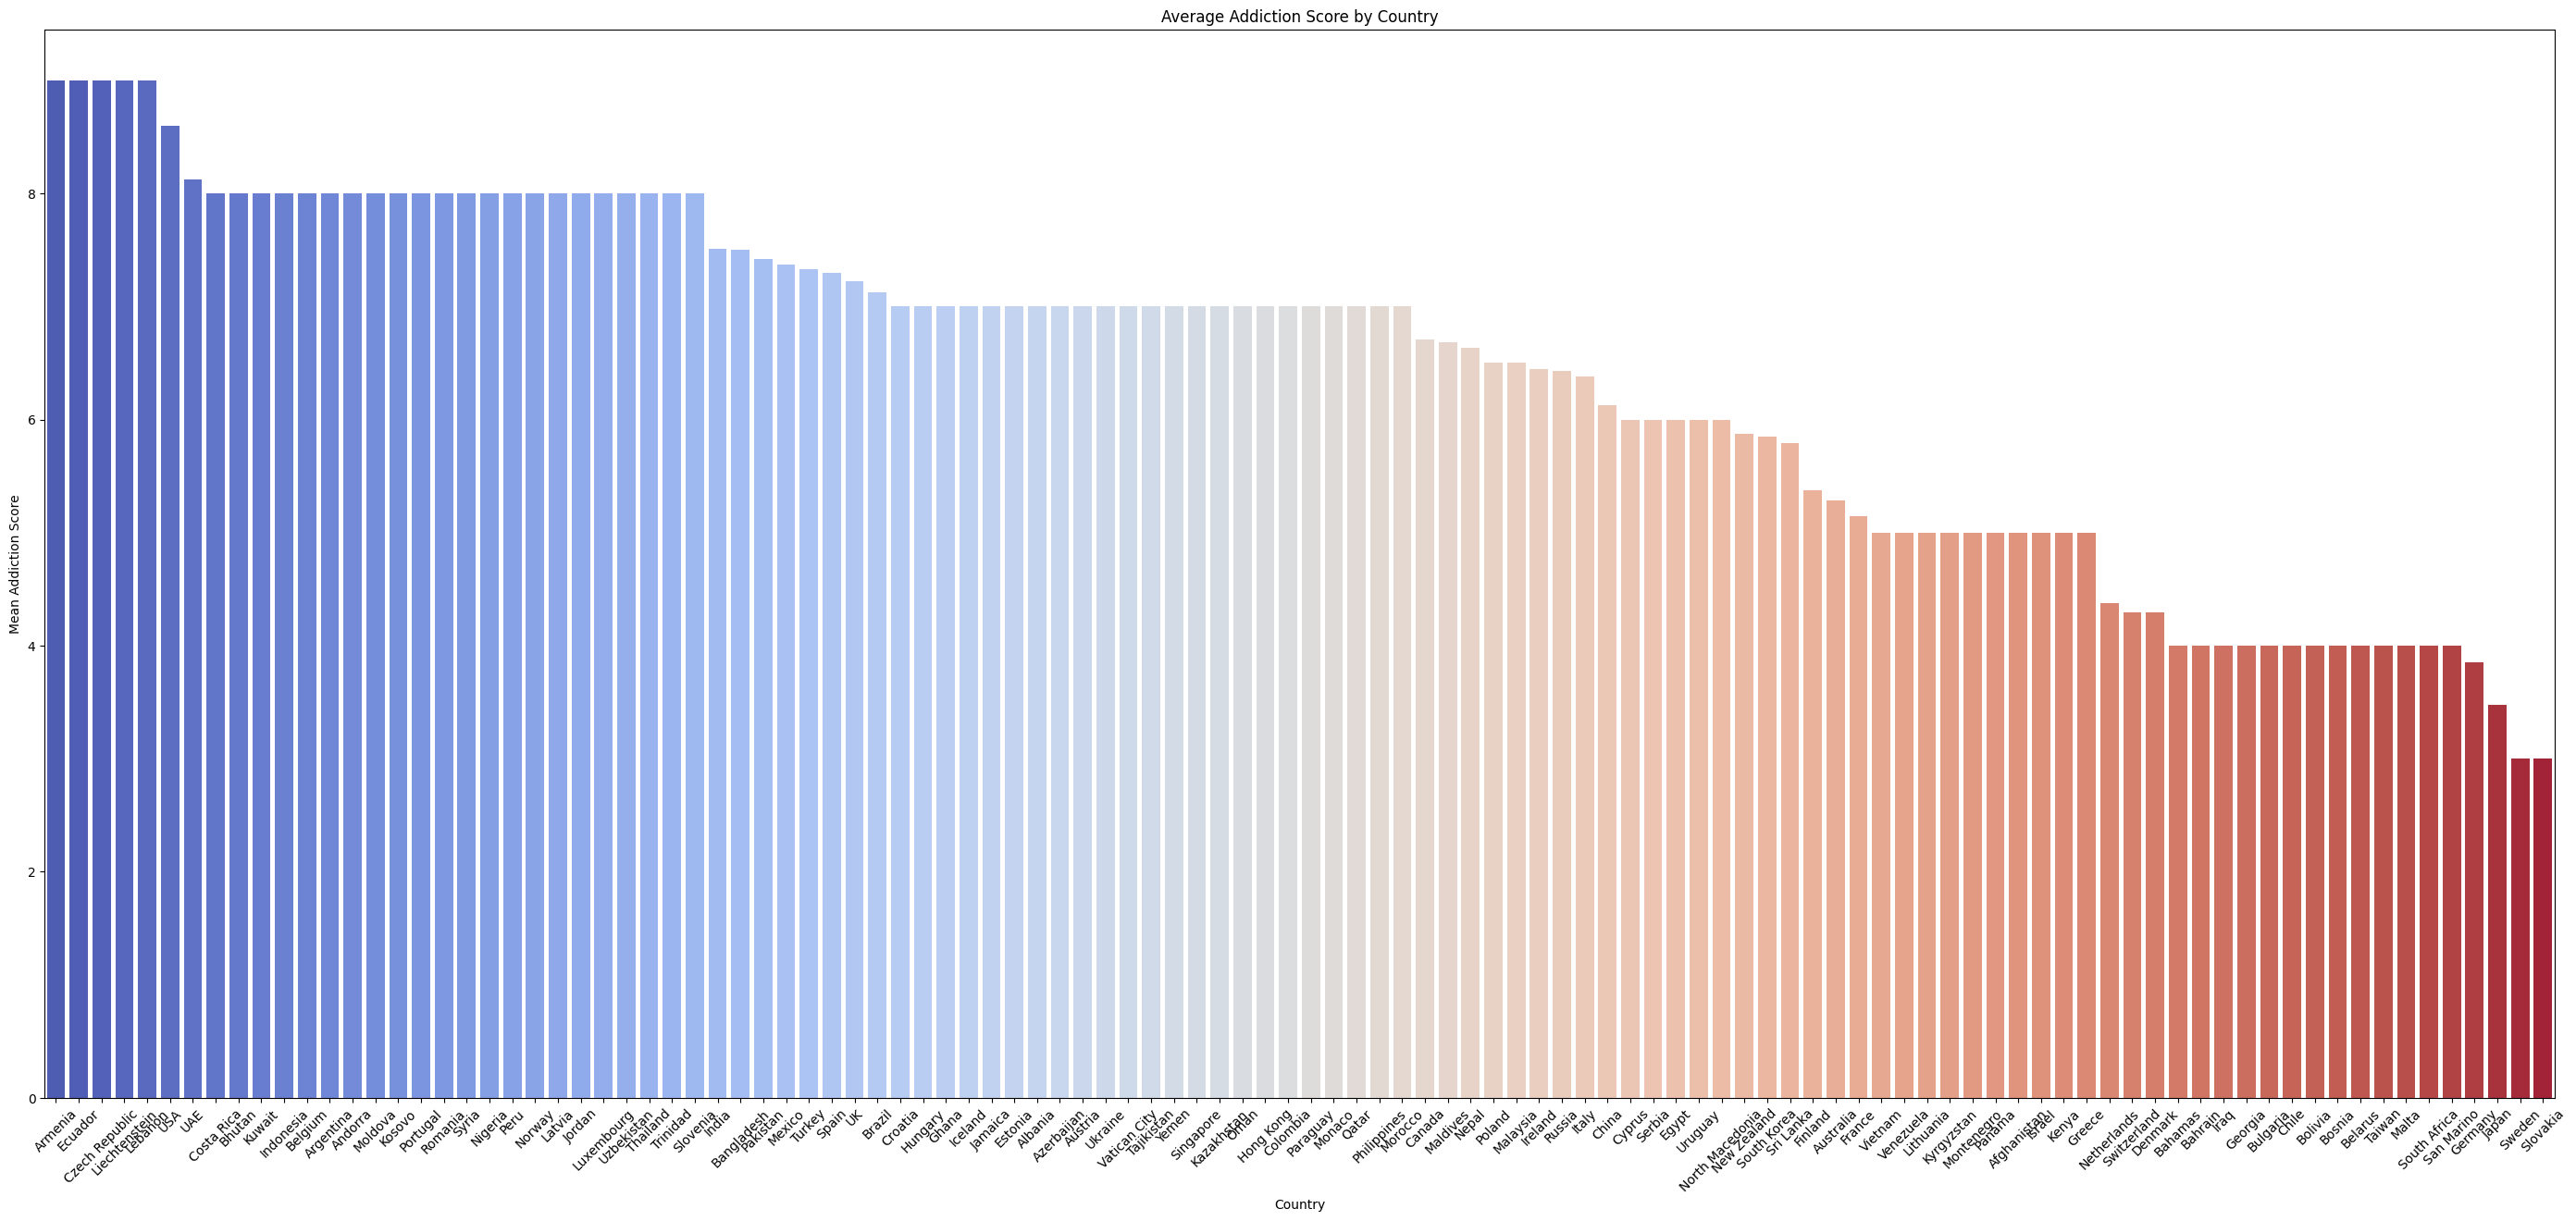

In [ ]:
# Segmentation ตาม Country
# Bar Chart ค่า Addiction Score เฉลี่ยตาม Country

seg_country = df.groupby("Country")["Addicted_Score"].mean().reset_index().sort_values(by="Addicted_Score", ascending=False)
plt.figure(figsize=(35,15))
sns.barplot(data=seg_country, x="Country", y="Addicted_Score", palette="coolwarm")
plt.title("Average Addiction Score by Country")
plt.xticks(rotation=45)
plt.ylabel("Mean Addiction Score")
plt.show()

### Hidden Relationships (ความสัมพันธ์แฝง)

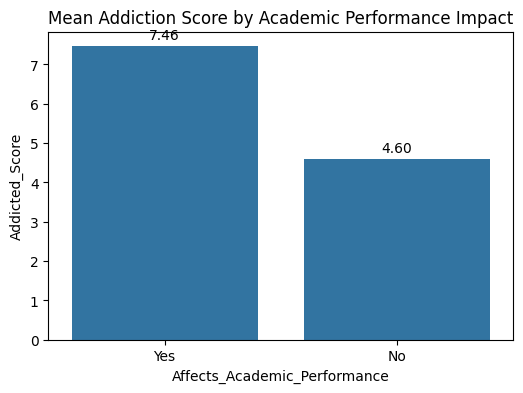

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=df, x="Affects_Academic_Performance", y="Addicted_Score", errorbar=None
    #estimator=np.mean, errorbar=("ci",95), palette="coolwarm" # errorbar=("ci",95) ช่วงความเชื่อมั่นที่ระดับ 95%
)
ax.set_title("Mean Addiction Score by Academic Performance Impact")

# ใส่ตัวเลขบนแท่งกราฟ
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0, 3), textcoords='offset points')

ax.set_title("Mean Addiction Score by Academic Performance Impact")
plt.show()


นักเรียนที่มี Addiction Score สูง มักรายงานว่าโซเชียลมีผลต่อการเรียนมากกว่า (ความสัมพันธ์เชิงบวก, มีนัยสำคัญ)

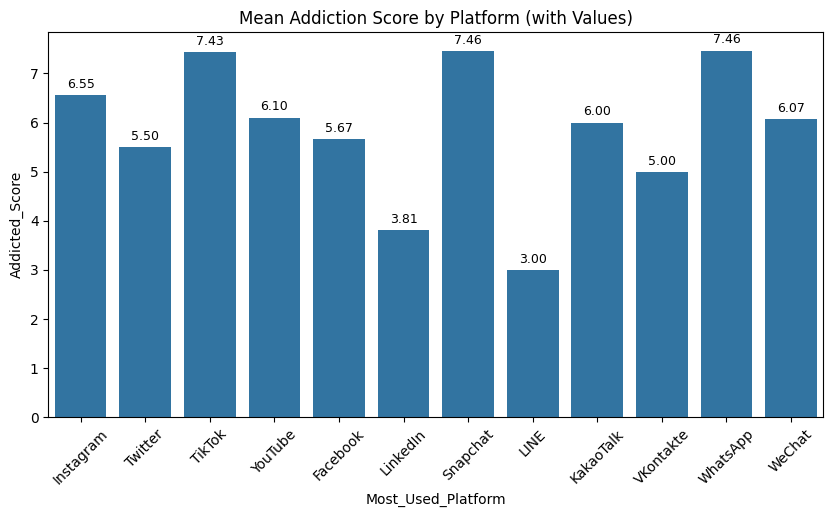

In [ ]:
plt.figure(figsize=(10,5))
order_idx = df.groupby("Most_Used_Platform")["Addicted_Score"].mean().sort_values().index
ax = sns.barplot(
    data=df, x="Most_Used_Platform", y="Addicted_Score", errorbar=None ,
    #order=order_idx, estimator=np.mean, errorbar=("ci",95), palette="viridis" # errorbar=("ci",95) ช่วงความเชื่อมั่นที่ระดับ 95%
)

# เพิ่มตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.title("Mean Addiction Score by Platform (with Values)")
plt.show()

Addiction Score แตกต่างกันอย่างมีนัยสำคัญระหว่างแพลตฟอร์ม
โดยแพลตฟอร์มที่มีค่า Addiction Score เฉลี่ยสูงที่สุด ได้แก่ TikTok, Snapchat, WhatsApp บ่งบอกว่าผู้ใช้แพลตฟอร์มเหล่านี้มีแนวโน้ม “ติด” สูงกว่ากลุ่มอื่น

## Insight

การวิเคราะห์ข้อมูลชี้ให้เห็นว่า พฤติกรรมการใช้โซเชียลมีเดียส่งผลโดยตรงต่อผลการเรียน สุขภาพ และความสัมพันธ์ของนักศึกษา โดยแม้ข้อมูลจะกระจายไม่สมดุลในด้านเพศ ระดับการศึกษา และประเทศ แต่ก็แสดงแนวโน้มที่ชัดเจนเกี่ยวกับการใช้โซเชียลเกินเวลาและผลลัพธ์เชิงลบต่อทั้งการเรียนและสุขภาพจิต

**ภาพรวมข้อมูล**

ข้อมูลนักศึกษามีจำนวนทั้งสิ้น 705 คน มาจากหลายประเทศ ตัวแปรสำคัญที่ศึกษา ได้แก่ เวลาใช้งานโซเชียล (Avg_Daily_Usage_Hours), การนอน (Sleep Hours), สุขภาพจิต (Mental Health), ความสัมพันธ์ และคะแนนการเสพติด (Addicted_Score) โดยพบว่าค่าการเสพติดส่วนใหญ่กระจายอยู่ในระดับปานกลางถึงสูง

**การกระจายตัวที่น่าสนใจ**

นักศึกษาส่วนใหญ่ใช้โซเชียลมีเดียวันละ 3–6 ชั่วโมง ขณะที่ชั่วโมงการนอนเฉลี่ยอยู่ที่ 6–7 ชั่วโมงต่อคืน กลุ่มที่นอนน้อยกว่า 6 ชั่วโมงมักมีคะแนนการเสพติดสูงกว่า
แพลตฟอร์มยอดนิยมคือ Instagram และ TikTok โดยผู้ใช้สองแพลตฟอร์มนี้มักมีคะแนนการเสพติดสูงกว่าผู้ใช้แพลตฟอร์มอื่น

**ความสัมพันธ์ระหว่างตัวแปร**

เมื่ออายุเพิ่มขึ้น ระดับการเสพติดมีแนวโน้มลดลงเล็กน้อย
ทั้งเพศชายและหญิงส่วนใหญ่ตอบว่าโซเชียลมีผลกระทบต่อการเรียนมากกว่าร้อยละ 60 โดยเพศหญิงมีสัดส่วนสูงกว่าเพศชายเล็กน้อย
การใช้โซเชียลมีเดียมากขึ้นสัมพันธ์กับชั่วโมงการนอนที่ลดลง
คะแนนการเสพติดที่สูงสัมพันธ์กับสุขภาพจิตที่แย่ลง และยังสัมพันธ์กับการเกิดความขัดแย้งในความสัมพันธ์ที่มากขึ้น

**แนวโน้มตามกลุ่มนักศึกษา**

นักศึกษาระดับ ปริญญาตรี (Undergraduate) มีค่า Addicted_Score โดยเฉลี่ยสูงที่สุด และเป็นกลุ่มที่รายงานผลกระทบต่อการเรียนมากที่สุด
นักศึกษาระดับ บัณฑิตศึกษา (Graduate) โดยรวมได้รับผลกระทบต่อการเรียนต่ำกว่า แต่ยังมีกลุ่มย่อยที่ใช้โซเชียลหนักจนมีคะแนนเสพติดสูง
นักเรียน มัธยม (High School) มีจำนวนตัวอย่างน้อย แต่พบความผันผวนสูงในค่า Addicted_Score

# Summary project progress

**การเตรียมข้อมูล (Data Preparation)**

**Import Packages และ Dataset**

โหลด libraries ที่จำเป็น: pandas, numpy, seaborn, matplotlib, statsmodels
นำเข้าข้อมูล StudentsSocialMediaAddiction.csv (705 แถว, 13 คอลัมน์)
ตรวจสอบโครงสร้างข้อมูลเบื้องต้น

**Data Acquisition และ Quality Assessment**

การสำรวจข้อมูลเบื้องต้น:
ตรวจสอบ shape ของข้อมูล: 705 rows × 13 columns
ดู data types: int64 (5), float64 (2), object (6)
แสดง head() และ tail() เพื่อดูตัวอย่างข้อมูล
ตรวจสอบ column names

**การประเมินคุณภาพข้อมูล (Data Quality Assessment)**

**Missing Values Check**

ตรวจสอบ missing values ในทุกคอลัมน์
ผลลัพธ์: ไม่พบ missing values เลย (0 ใน 13 คอลัมน์ทั้งหมด)

**Duplicate Detection**

ตรวจสอบข้อมูลซ้ำ
ผลลัพธ์: ไม่พบแถวซ้ำ (0 duplicate rows)

**Outlier**
ใช้ 2 วิธีในการตรวจสอบ:

**IQR Method:** ตรวจพบ outliers ในคอลัมน์ Avg_Daily_Usage_Hours และ Sleep_Hours_Per_Night

**Z-score Method:** ตรวจสอบค่าที่มี Z-score > 3
สร้าง boxplots สำหรับทุกตัวแปรเชิงตัวเลข

**การทำความสะอาดข้อมุล (Data Cleaning)**

**Outlier**

ใช้ฟังก์ชัน cap_outliers_iqr() เพื่อปรับค่า outliers
Capping outliers ในคอลัมน์ Avg_Daily_Usage_Hours และ Sleep_Hours_Per_Night



**Validation หลังทำความสะอาด**
ตรวจสอบผลลัพธ์หลังการทำความสะอาด
ตรวจสอบ outliers อีกครั้งด้วยทั้ง IQR และ Z-score
ยืนยันว่าไม่มี outliers เหลืออยู่

**การแปลงข้อมูล (Data Transformation)**

**Label Encoding**

สร้าง Academic_Level_Label จาก Academic_Level
Mapping: High School=0, Undergraduate=1, Graduate=2

**Feature Engineering (Enriching)**
สร้างตัวแปรใหม่ 3 ตัว:

**Sleep_Category:** จัดกลุ่มชั่วโมงนอน

Low (<6 ชม.), Normal (6-8 ชม.), High (>8 ชม.)


**Usage_Sleep_Ratio:** อัตราส่วนการใช้โซเชียลต่อการนอน

Avg_Daily_Usage_Hours ÷ Sleep_Hours_Per_Night


**Platform_Group:** จัดกลุ่มแพลตฟอร์ม

- Entertainment: TikTok, YouTube, Instagram
- Socializing: Facebook, WhatsApp, LINE, etc.
- Information: Twitter, LinkedIn, Reddit


**การตรวจสอบความถูกต้อง (Data Validation)**

**Validation**

- ตรวจสอบ missing values, duplicates อีกครั้ง

- ตรวจสอบช่วงค่าของตัวแปรตัวเลข

- ตรวจสอบค่าที่เป็นไปได้ของตัวแปรเชิงหมวดหมู่

**Consistency Check**

ตรวจสอบความสอดคล้องระหว่าง Age และ Academic_Level
สร้าง flag สำหรับข้อมูลที่ไม่สอดคล้อง
ผลลัพธ์: ไม่พบความไม่สอดคล้อง (0 violations)

**Data Export**

Export ข้อมูลที่ทำความสะอาดแล้วเป็น StudentsSocialMediaAddiction_cleaned.csv

**การวิเคราะห์ข้อมูลเชิงสำรวจ (Exploratory Data Analysis)**

**Descriptive Statistics**
สถิติพื้นฐานสำหรับตัวแปรตัวเลขทั้งหมด:

Mean, Median, Mode, Standard Deviation
Skewness และ Kurtosis
Min, Max, Quartiles

**Univariate Analysis**
- ตัวแปรเชิงตัวเลข (6 ตัว): สร้าง Histograms และ Boxplots
วิเคราะห์การกระจายของแต่ละตัวแปร

- ตัวแปรเชิงหมวดหมู่ (6 ตัว): สร้าง Bar Charts และ Frequency Tables วิเคราะห์สัดส่วนในแต่ละหมวดหมู่

**Bivariate Analysis**

**Numerical vs Numerical:**

- Scatter plots:

Usage_Sleep_Ratio vs Addicted_Score (เพื่อหาความสัมพันธ์ระหว่างอัตราส่วนการใช้งาน/การนอนกับระดับการเสพติด)

Age vs Avg_Daily_Usage_Hours, Mental_Health_Score (เพื่อศึกษาว่าอายุส่งผลต่อการใช้งานและสุขภาพจิตหรือไม่)

- Regression plot:

Age vs Addicted_Score (เพื่อดูแนวโน้มการเปลี่ยนแปลงของการเสพติดตามอายุ)

**Categorical vs Numerical:**

- Box plots:

Gender vs Addicted_Score (เพื่อเปรียบเทียบระดับการเสพติดระหว่างเพศชายและหญิง)

- Bar plots:

Platform_Group vs Addicted_Score (เพื่อดูว่าแพลตฟอร์มประเภทไหนทำให้เสพติดมากกว่า)

Academic_Level vs Addicted_Score (เพื่อศึกษาความแตกต่างการเสพติดตามระดับการศึกษา)

**Categorical vs Categorical:**

- Cross-tabulations และ Stacked bar charts

Gender vs Affects_Academic_Performance (เพื่อดูว่าเพศใดได้รับผลกระทบทางการเรียนมากกว่า)

Academic_Level vs Relationship_Status (เพื่อศึกษารูปแบบความสัมพันธ์ตามระดับการศึกษา)

Most_Used_Platform vs Gender (เพื่อหาแนวโน้มการเลือกใช้แพลตฟอร์มแยกตามเพศ)

**Multivariate Analysis**

**Correlation Analysis:**

สร้าง Correlation Matrix สำหรับตัวแปรตัวเลข
Heatmap visualization

**Pairplot Analysis:**

Pairwise relationships ระหว่างตัวแปรสำคัญ 5 ตัว

**Group Analysis:**

Group by Academic_Level + Gender


**การค้นหาแนวโน้มและรูปแบบ (Pattern & Trend Detection)**

**Segmentation Analysis**

การแบ่งกลุ่มตาม Academic_Level, Gender, Platform
การเปรียบเทียบ Addiction Score เฉลี่ยแต่ละกลุ่ม
การวิเคราะห์ความแตกต่างระหว่างประเทศ

**Hidden Relationships Discovery**

ความสัมพันธ์ระหว่าง Addiction Score กับ Academic Performance
Platform-specific addiction patterns
Usage patterns และผลกระทบต่อสุขภาพ


**การค้นหาแนวโน้ม และรูปแบบ (Pattern & Trend Detection)**
**Segmentation Analysis**

- การแบ่งกลุ่มตาม Academic_Level, Gender, Platform
- การเปรียบเทียบ Addiction Score เฉลี่ยแต่ละกลุ่ม
- การวิเคราะห์ความแตกต่างระหว่างประเทศ

**Hidden Relationships Discovery**

- ความสัมพันธ์ระหว่าง Addiction Score กับ Academic Performance
- Platform-specific addiction patterns
- Usage patterns และผลกระทบต่อสุขภาพ

## 1. การติดโซเชียลมีความสัมพันธ์กับผลการเรียนหรือไม่?


การติดโซเชียลมีความสัมพันธ์กับผลการเรียนอย่างมาก

* นักศึกษาที่รู้สึกว่าโซเชียลส่งผลกระทบต่อการเรียน มีระดับการเสพติดโซเชียลสูงกว่าอย่างชัดเจน
สามารถบ่งชี้ถึง ความสัมพันธ์เชิงบวก ระหว่าง “ระดับการติดโซเชียล” และ “การกระทบต่อผลการเรียน”

* ยิ่งติดโซเชียลมาก ยิ่งมีโอกาสที่ผลการเรียนจะได้รับผลกระทบ

## 2. ปัจจัยประชากร(Demographics) เช่น อายุ เพศ ส่งผลต่อการติดโซเชียลไหม?


ปัจจัยประชากรมีผลต่อระดับการเสพติด แต่ความรุนแรงจะแตกต่างกันไป

* จากกราฟ Scatter + Regression line: เมื่ออายุมากขึ้น ค่า Addicted_Score มีแนวโน้มลดลงเล็กน้อย
แปลว่า นักศึกษาที่อายุน้อยกว่ามีแนวโน้มติดโซเชียลมากกว่า

* จาก Histrogram:
High School มีค่า Addiction Score เฉลี่ยสูงสุด (~ 8)
Undergraduate อยู่ระดับกลาง (~ 6.5)
Graduate ต่ำที่สุด (~ 6.2)
สะท้อนว่า วัยมัธยมมีความเสี่ยงเสพติดสูงสุด และเมื่อระดับการศึกษาเพิ่มขึ้น ความเสพติดลดลง

* เพศ (Gender)
จาก Boxplot:
Female มี Median Addiction Score สูงกว่า Male
การกระจายของ Female เอียงไปทางค่าสูงกว่า แสดงว่ามีสัดส่วนผู้หญิงติดโซเชียลมากกว่า
แต่ทั้งสองเพศมีช่วงคะแนนที่กว้าง คล้ายกัน (ทั้งมีคนติดน้อยและติดมากในทุกเพศ)


## 3. พฤติกรรมการใช้งานแพลตฟอร์มสัมพันธ์กับระดับการติดโซเชียลมีเดียหรือไม่?

พฤติกรรมการใช้งานสัมพันธ์กับระดับการติดโซเชียลอย่างเห็นได้ชัด


* ผู้ที่ใช้แพลตฟอร์มเพื่อความบันเทิง (Entertainment)มีแนวโน้มที่ค่า addicted_score สูงกว่า ขณะที่แพลตฟอร์มที่เน้นข้อมูล/ข่าวสาร (Information) มีระดับการเสพติดต่ำที่สุด

*   ส่วนที่มี่ค่า addicted_score สูง : WhatsApp (7.46) , Snapchat (7.46) , Tiktok (7.43)
*   ส่วนที่มี่ค่า addicted_score ต่ำ : LinkedIn (3.81), LINE (3.0)




In [ ]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Addicted_Score,Academic_Level_Label,Most_Used_Platform_Encoded,Affects_Academic_Performance_Encoded,Relationship_Status_Encoded,Addicted_Binary,Sleep_Category,Usage_Sleep_Ratio,Platform_Group,Platform_Group_Encoded
0,1,19,1,Undergraduate,Bangladesh,5,Instagram,Yes,6,6,...,8,1,0,1,0,1,Low,0.83,Entertainment,0
1,2,22,0,Graduate,India,2,Twitter,No,7,8,...,3,2,1,0,1,0,Normal,0.29,Information,1
2,3,20,1,Undergraduate,USA,6,TikTok,Yes,5,5,...,9,1,2,1,2,1,Low,1.20,Entertainment,0
3,4,18,0,High School,UK,3,YouTube,No,7,7,...,4,0,3,0,1,0,Normal,0.43,Entertainment,0
4,5,21,0,Graduate,Canada,4,Facebook,Yes,6,6,...,7,2,4,1,0,1,Low,0.67,Socializing,2


In [ ]:
selected_columns = [
    'Age',
    'Gender',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Academic_Level_Label',
    'Usage_Sleep_Ratio',
    'Most_Used_Platform_Encoded',
    'Affects_Academic_Performance_Encoded',
    'Relationship_Status_Encoded',
    'Platform_Group_Encoded',
    'Addicted_Score'

]

df_Addicted_Score = df[selected_columns].copy()

print("New DataFrame 'df_Addicted_Score' created with selected columns:")
display(df_Addicted_Score.head())
print("\nInfo of 'df_Addicted_Score':")
df_Addicted_Score.info()

New DataFrame 'df_Addicted_Score' created with selected columns:


,Age,Gender,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Academic_Level_Label,Usage_Sleep_Ratio,Most_Used_Platform_Encoded,Affects_Academic_Performance_Encoded,Relationship_Status_Encoded,Platform_Group_Encoded,Addicted_Score
0,19,1,5,6,6,3,1,0.83,0,1,0,0,8
1,22,0,2,7,8,0,2,0.29,1,0,1,1,3
2,20,1,6,5,5,4,1,1.20,2,1,2,0,9
3,18,0,3,7,7,1,0,0.43,3,0,1,0,4
4,21,0,4,6,6,2,2,0.67,4,1,0,2,7



Info of 'df_Addicted_Score':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   705 non-null    int64  
 1   Gender                                705 non-null    int64  
 2   Avg_Daily_Usage_Hours                 705 non-null    int64  
 3   Sleep_Hours_Per_Night                 705 non-null    int64  
 4   Mental_Health_Score                   705 non-null    int64  
 5   Conflicts_Over_Social_Media           705 non-null    int64  
 6   Academic_Level_Label                  705 non-null    int64  
 7   Usage_Sleep_Ratio                     705 non-null    float64
 8   Most_Used_Platform_Encoded            705 non-null    int64  
 9   Affects_Academic_Performance_Encoded  705 non-null    int64  
 10  Relationship_Status_Encoded           705 non-null    in

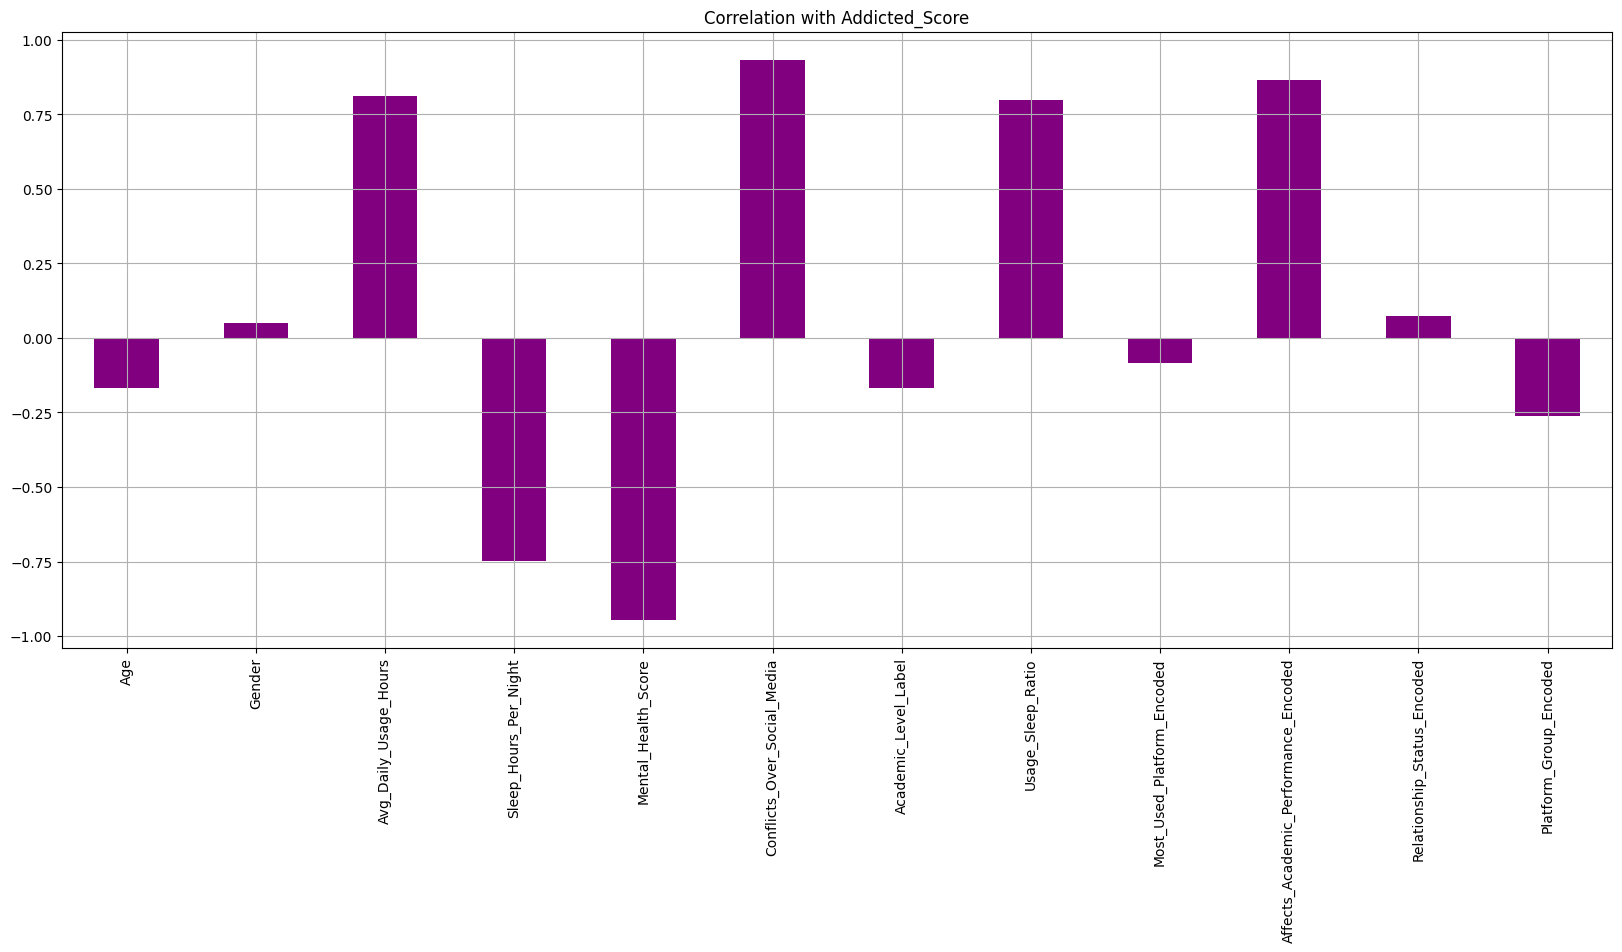

In [ ]:
# Convert 'Diabetes_binary' back to numeric for correlation calculation
df_Addicted_Score.drop('Addicted_Score', axis=1).corrwith(df_Addicted_Score.Addicted_Score).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Addicted_Score",color="Purple");

#**Model**

In [ ]:
selected_columns = [
    'Age',
    'Gender',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Academic_Level_Label',
    'Usage_Sleep_Ratio',
    'Most_Used_Platform_Encoded',
    'Affects_Academic_Performance_Encoded',
    'Relationship_Status_Encoded',
    'Platform_Group_Encoded',
    'Addicted_Binary'
]

df_selected = df[selected_columns].copy()

print("New DataFrame 'df_selected' created with selected columns:")
display(df_selected.head())
print("\nInfo of 'df_selected':")
df_selected.info()

New DataFrame 'df_selected' created with selected columns:


,Age,Gender,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Academic_Level_Label,Usage_Sleep_Ratio,Most_Used_Platform_Encoded,Affects_Academic_Performance_Encoded,Relationship_Status_Encoded,Platform_Group_Encoded,Addicted_Binary
0,19,1,5,6,6,3,1,0.83,0,1,0,0,1
1,22,0,2,7,8,0,2,0.29,1,0,1,1,0
2,20,1,6,5,5,4,1,1.20,2,1,2,0,1
3,18,0,3,7,7,1,0,0.43,3,0,1,0,0
4,21,0,4,6,6,2,2,0.67,4,1,0,2,1



Info of 'df_selected':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   705 non-null    int64  
 1   Gender                                705 non-null    int64  
 2   Avg_Daily_Usage_Hours                 705 non-null    int64  
 3   Sleep_Hours_Per_Night                 705 non-null    int64  
 4   Mental_Health_Score                   705 non-null    int64  
 5   Conflicts_Over_Social_Media           705 non-null    int64  
 6   Academic_Level_Label                  705 non-null    int64  
 7   Usage_Sleep_Ratio                     705 non-null    float64
 8   Most_Used_Platform_Encoded            705 non-null    int64  
 9   Affects_Academic_Performance_Encoded  705 non-null    int64  
 10  Relationship_Status_Encoded           705 non-null    int64  


In [ ]:
display(df_selected.head())

,Age,Gender,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Academic_Level_Label,Usage_Sleep_Ratio,Most_Used_Platform_Encoded,Affects_Academic_Performance_Encoded,Relationship_Status_Encoded,Platform_Group_Encoded,Addicted_Binary
0,19,1,5,6,6,3,1,0.83,0,1,0,0,1
1,22,0,2,7,8,0,2,0.29,1,0,1,1,0
2,20,1,6,5,5,4,1,1.20,2,1,2,0,1
3,18,0,3,7,7,1,0,0.43,3,0,1,0,0
4,21,0,4,6,6,2,2,0.67,4,1,0,2,1


In [ ]:
df.shape

(705, 22)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(df_selected['Addicted_Binary'].value_counts())

Addicted_Binary
1    469
0    236
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE # Import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Separate features and target from the downsampled data
X = df_selected.drop('Addicted_Binary', axis=1)
y = df_selected['Addicted_Binary']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (564, 12)
Shape of X_test: (141, 12)
Shape of y_train: (564,)
Shape of y_test: (141,)


## **GaussianNB**

In [ ]:
# pipeline
pipe_gnb = Pipeline([
    ('scaler', StandardScaler()),       # optional, GNB ไม่ sensitive เท่าไหร่
    ('smote', SMOTE(random_state=42)), # balance class
    ('model', GaussianNB())
])

# Fit pipeline
pipe_gnb.fit(X_train, y_train)

# Predict
y_pred_gnb = pipe_gnb.predict(X_test)

# Evaluate
print("GaussianNB Classification Report")
print(classification_report(y_test, y_pred_gnb, digits=3))

GaussianNB Classification Report
              precision    recall  f1-score   support

           0      0.904     1.000     0.949        47
           1      1.000     0.947     0.973        94

    accuracy                          0.965       141
   macro avg      0.952     0.973     0.961       141
weighted avg      0.968     0.965     0.965       141



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.9804964539007093
0.9645390070921985


In [ ]:
y_preds_gnb = gnb.predict(X_test)

In [ ]:
y_preds_gnb

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


print('Accuracy:', '%.3f' % accuracy_score(y_test, y_pred_gnb))
print('Precision:', '%.3f' % precision_score(y_test, y_pred_gnb))
print('Recall:', '%.3f' % recall_score(y_test, y_pred_gnb))
print('F1-score:', '%.3f' % f1_score(y_test, y_pred_gnb))

Accuracy: 0.965
Precision: 1.000
Recall: 0.947
F1-score: 0.973


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Return a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )

    disp.plot(values_format='')
    plt.show()

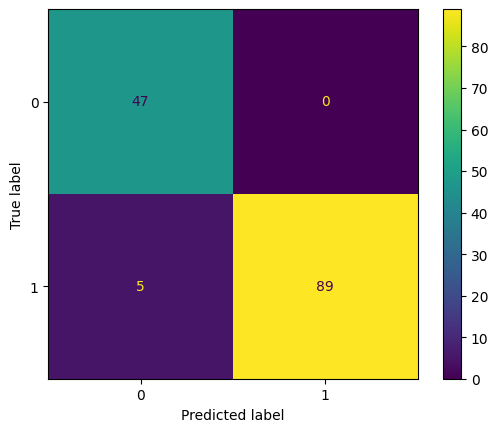

In [ ]:
conf_matrix_plot(gnb, X_test, y_test)

In [ ]:
y_preds_series = pd.Series(y_preds_gnb)

# Now you can use value_counts()
y_preds_series.value_counts()

,count
1,89
0,52


##**KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create pipeline (scaler → SMOTE → KNN)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'model__n_neighbors': [1],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['minkowski', 'euclidean', 'manhattan']
}

# Setup GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='f1',        # เหมาะกับ imbalanced dataset
    n_jobs=-1
)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred , digits=3))

Best parameters: {'model__metric': 'minkowski', 'model__n_neighbors': 1, 'model__weights': 'uniform'}

Classification Report:
               precision    recall  f1-score   support

           0      0.979     1.000     0.989        47
           1      1.000     0.989     0.995        94

    accuracy                          0.993       141
   macro avg      0.990     0.995     0.992       141
weighted avg      0.993     0.993     0.993       141



In [ ]:
# Create KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Train Accuracy:', '%.3f' % knn.score(X_train, y_train))
print('Test Accuracy:', '%.3f' % knn.score(X_test, y_test))

Train Accuracy: 0.989
Test Accuracy: 0.965


อันที่แก้ใหม่

In [ ]:
# Train/Test Accuracy จาก best_model (หลัง GridSearchCV)
print('Train Accuracy:', '%.3f' % best_model.score(X_train, y_train))
print('Test Accuracy:', '%.3f' % best_model.score(X_test, y_test))

Train Accuracy: 1.000
Test Accuracy: 0.993


In [ ]:
#Hyperparameter tuning (GridsearchCV)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search, only for n_neighbors
param_grid = {'n_neighbors': range(1, 21, 2)  }


# Set up the GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21, 2)}, scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best cross-validation score: {best_score:.3f}")
print(f"Best n_neighbors: {best_n_neighbors}")

Best cross-validation score: 0.986
Best n_neighbors: 1


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors= 3 )
knn_best.fit(X_train, y_train)


# Evaluate the model on the test set
print("test-set score:{:.3f}".format(knn_best.score(X_test, y_test)))

test-set score:0.986


อันที่แก้ใหม่

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='minkowski')
knn_best.fit(X_train, y_train)

# Evaluate the model on the test set
print("test-set score: {:.3f}".format(knn_best.score(X_test, y_test)))

test-set score: 0.993


In [ ]:
y_preds_knn = knn_best.predict(X_test)
y_preds_knn

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred_knn = best_model.predict(X_test)

print('Accuracy:', '%.3f' % accuracy_score(y_test, y_pred_knn))
print('Precision:', '%.3f' % precision_score(y_test, y_pred_knn))
print('Recall:', '%.3f' % recall_score(y_test, y_pred_knn))
print('F1-score:', '%.3f' % f1_score(y_test, y_pred_knn))

Accuracy: 0.993
Precision: 1.000
Recall: 0.989
F1-score: 0.995


In [ ]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts a model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)

    # Plot ด้วยสี default ของ ConfusionMatrixDisplay
    disp.plot(values_format='d')  # 'd' ให้เป็นจำนวนเต็ม
    plt.show()

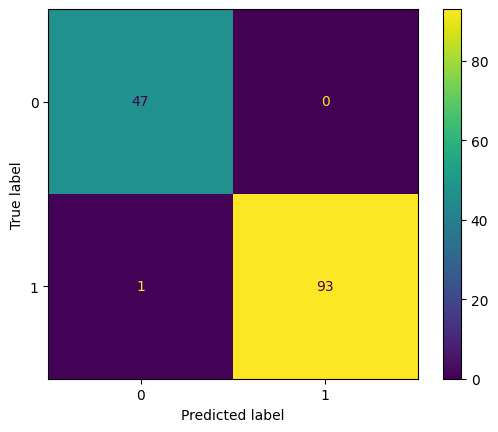

In [ ]:
conf_matrix_plot(knn_best, X_test, y_test)

# ตรวจสอบและแก้ไข Data Leakage



ตรวจสอบ Multicollinearityint
เหตุผลที่ต้องตรวจสอบ:

เมื่อโมเดลให้ผลลัพธ์ดีเกินไป (Accuracy > 95%) อาจเกิดจาก:

1. Data Leakage (ข้อมูลรั่วไหล):
   - มี feature ที่เกี่ยวข้องโดยตรงกับ target
   - เช่น ใช้ Addicted_Score เพื่อทำนาย Addicted_Binary

2. Multicollinearity (ความสัมพันธ์สูง):
   - Features มีความสัมพันธ์กันมากเกินไป (correlation > 0.8-0.9)
   - ทำให้โมเดลไม่เสถียร และตีความยาก

3. Overfitting:
   - โมเดลจำข้อมูล training แทนที่จะเรียนรู้ pattern จริง
   - ทำงานได้ดีบน training data แต่แย่บน new data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Correlation Matrix
print("1. Correlation Matrix Analysis")

numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = X_train[numerical_cols].corr()

print(f"\nจำนวน Numerical Features: {len(numerical_cols)}")
print(f"Features: {numerical_cols}")

# หาคู่ที่มี correlation สูง
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', ascending=False, key=abs)
    print(f"\nพบ Feature Pairs ที่มี Correlation สูง (|r| > 0.7):")
    print(high_corr_df.to_string(index=False))
else:
    print("\nไม่พบ Feature Pairs ที่มี Correlation สูงเกินไป")

# 2. VIF Analysis
print("2. Variance Inflation Factor (VIF) Analysis")

scaler_vif = StandardScaler()
X_scaled_vif = scaler_vif.fit_transform(X_train[numerical_cols])

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(X_scaled_vif, i)
                   for i in range(len(numerical_cols))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data.to_string(index=False))

high_vif = vif_data[vif_data['VIF'] > 10]
if not high_vif.empty:
    print(f"\nพบ Features ที่มี VIF > 10:")
    print(high_vif.to_string(index=False))
else:
    print("\nทุก Features มี VIF < 10")

# 3. Target Correlation
print("3. Feature Correlation with Target Variable")

target_corr = X_train[numerical_cols].corrwith(y_train).sort_values(ascending=False, key=abs)
target_corr_df = pd.DataFrame({
    'Feature': target_corr.index,
    'Correlation with Target': target_corr.values
})

print("\n" + target_corr_df.to_string(index=False))

very_high_corr = target_corr_df[abs(target_corr_df['Correlation with Target']) > 0.9]
if not very_high_corr.empty:
    print(f"\nพบ Features ที่มี Correlation กับ Target สูงมาก (|r| > 0.9):")
    print(very_high_corr.to_string(index=False))
    print("\nนี่อาจเป็น Data Leakage!")
else:
    print("\nไม่พบ Data Leakage")

# 4. สรุปและหา features ที่ควรลบ
issues_found = []
features_to_remove = set()

if high_corr_pairs:
    issues_found.append(f"- พบ {len(high_corr_pairs)} คู่ที่มี correlation สูง")
    for pair in high_corr_pairs:
        try:
            f1_vif = vif_data[vif_data['Feature'] == pair['Feature 1']]['VIF'].values
            f2_vif = vif_data[vif_data['Feature'] == pair['Feature 2']]['VIF'].values
            features_to_remove.add(pair['Feature 1'] if f1_vif[0] > f2_vif[0] else pair['Feature 2'])
        except:
            pass

if not high_vif.empty:
    issues_found.append(f"- พบ {len(high_vif)} features ที่มี VIF > 10")
    features_to_remove.update(high_vif['Feature'].tolist())

if not very_high_corr.empty:
    issues_found.append(f"- พบ {len(very_high_corr)} features ที่มี correlation กับ target สูงมาก")

print("สรุปการตรวจสอบ Multicollinearity")

if issues_found:
    print("\nพบปัญหา:")
    for issue in issues_found:
        print(f"  {issue}")
    print(f"\nFeatures ที่แนะนำให้ลบ: {list(features_to_remove)}")
else:
    print("\nไม่พบปัญหา Multicollinearity ที่รุนแรง")

1. Correlation Matrix Analysis

จำนวน Numerical Features: 12
Features: ['Age', 'Gender', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Academic_Level_Label', 'Usage_Sleep_Ratio', 'Most_Used_Platform_Encoded', 'Affects_Academic_Performance_Encoded', 'Relationship_Status_Encoded', 'Platform_Group_Encoded']

พบ Feature Pairs ที่มี Correlation สูง (|r| > 0.7):
                  Feature 1                            Feature 2  Correlation
      Avg_Daily_Usage_Hours                    Usage_Sleep_Ratio     0.930280
        Mental_Health_Score          Conflicts_Over_Social_Media    -0.892992
      Sleep_Hours_Per_Night                    Usage_Sleep_Ratio    -0.868509
Conflicts_Over_Social_Media Affects_Academic_Performance_Encoded     0.830841
                        Age                 Academic_Level_Label     0.822901
 Most_Used_Platform_Encoded               Platform_Group_Encoded     0.811215
        Mental_Health_Score Affects_


เปรียบเทียบผลลัพธ์:

   Metric  Original (12 features)  Reduced (6 features)  Difference  Change (%)
 Accuracy                0.992908              0.978723   -0.014184   -1.428571
Precision                1.000000              0.989247   -0.010753   -1.075269
   Recall                0.989362              0.978723   -0.010638   -1.075269
 F1-Score                0.994652              0.983957   -0.010695   -1.075269
  AUC-ROC                0.994681              0.978723   -0.015957   -1.604278


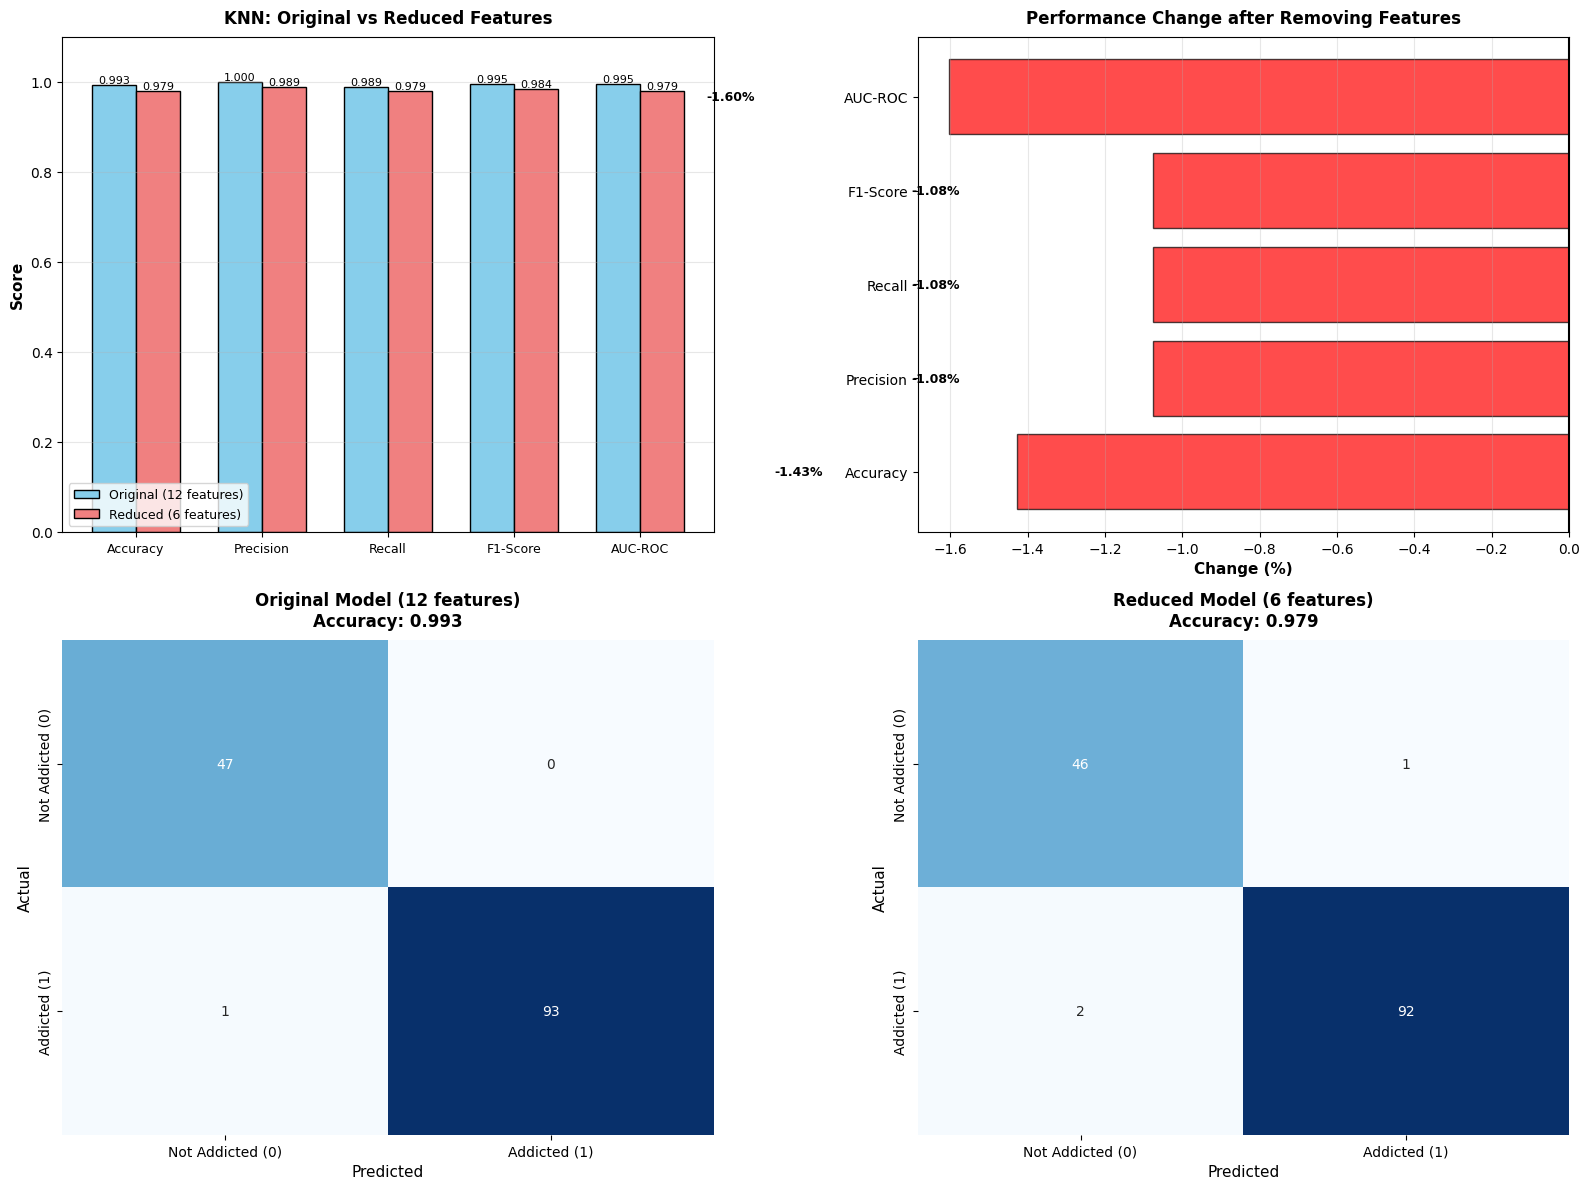


Classification Report (Reduced - 6 Features):

              precision    recall  f1-score   support

           0      0.958     0.979     0.968        47
           1      0.989     0.979     0.984        94

    accuracy                          0.979       141
   macro avg      0.974     0.979     0.976       141
weighted avg      0.979     0.979     0.979       141



In [ ]:
# ฟังก์ชันคำนวณ Metrics
def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0)
    }
    if y_pred_proba is not None:
        try:
            metrics['AUC-ROC'] = roc_auc_score(y_true, y_pred_proba)
        except:
            metrics['AUC-ROC'] = 0.0
    return metrics

# ฟังก์ชัน plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax=None):
    cm = confusion_matrix(y_true, y_pred)
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['Not Addicted (0)', 'Addicted (1)'],
                yticklabels=['Not Addicted (0)', 'Addicted (1)'])
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_ylabel('Actual', fontsize=11)
    ax.set_xlabel('Predicted', fontsize=11)
    return cm

# ====== เตรียม Data ======
# X_train, X_test, y_train, y_test ต้องมีอยู่แล้ว
# numerical_cols = list ของ 12 features
# features_to_remove = set ของ 6 features ที่ลบ

features_to_keep = [f for f in numerical_cols if f not in features_to_remove]

X_train_reduced = X_train[features_to_keep]
X_test_reduced = X_test[features_to_keep]

# ====== เลือกโมเดลที่ดีที่สุด (สมมติว่า KNN ดีกว่า) ======
best_model_name = 'KNN'
best_knn_params = {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'minkowski'}

# Original pipeline (12 features)
pipe_original = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(**best_knn_params))
])
pipe_original.fit(X_train, y_train)
y_pred_orig = pipe_original.predict(X_test)
y_pred_proba_orig = pipe_original.predict_proba(X_test)[:, 1]
metrics_orig = calculate_metrics(y_test, y_pred_orig, y_pred_proba_orig)

# Reduced pipeline (6 features)
pipe_reduced = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(**best_knn_params))
])
pipe_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = pipe_reduced.predict(X_test_reduced)
y_pred_proba_reduced = pipe_reduced.predict_proba(X_test_reduced)[:, 1]
metrics_reduced = calculate_metrics(y_test, y_pred_reduced, y_pred_proba_reduced)

# ====== เปรียบเทียบ Metrics ======
comparison_multi = pd.DataFrame({
    'Metric': list(metrics_reduced.keys()),
    'Original (12 features)': [metrics_orig[k] for k in metrics_reduced.keys()],
    f'Reduced ({len(features_to_keep)} features)': list(metrics_reduced.values()),
    'Difference': [metrics_reduced[k] - metrics_orig[k] for k in metrics_reduced.keys()],
    'Change (%)': [(metrics_reduced[k] - metrics_orig[k]) / metrics_orig[k] * 100
                   if metrics_orig[k] != 0 else 0
                   for k in metrics_reduced.keys()]
})

print("\nเปรียบเทียบผลลัพธ์:\n")
print(comparison_multi.to_string(index=False))

# ====== Visualization ======
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Metrics Comparison
ax = axes[0, 0]
x = np.arange(len(metrics_reduced))
width = 0.35
bars1 = ax.bar(x - width/2, comparison_multi['Original (12 features)'], width,
               label='Original (12 features)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, comparison_multi[f'Reduced ({len(features_to_keep)} features)'], width,
               label=f'Reduced ({len(features_to_keep)} features)',
               color='lightcoral', edgecolor='black')
ax.set_ylabel('Score', fontsize=11, fontweight='bold')
ax.set_title(f'{best_model_name}: Original vs Reduced Features', fontsize=12, fontweight='bold', pad=10)
ax.set_xticks(x)
ax.set_xticklabels(comparison_multi['Metric'], rotation=0, fontsize=9)
ax.legend(fontsize=9)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 2. Performance Change (%)
ax = axes[0, 1]
colors = ['green' if x >= 0 else 'red' for x in comparison_multi['Change (%)']]
bars = ax.barh(comparison_multi['Metric'], comparison_multi['Change (%)'],
               color=colors, edgecolor='black', alpha=0.7)
ax.axvline(x=0, color='black', linewidth=1.5)
ax.set_xlabel('Change (%)', fontsize=11, fontweight='bold')
ax.set_title('Performance Change after Removing Features', fontsize=12, fontweight='bold', pad=10)
ax.grid(axis='x', alpha=0.3)
for bar, val in zip(bars, comparison_multi['Change (%)']):
    x_pos = val + (0.5 if val > 0 else -0.5)
    ax.text(x_pos, bar.get_y() + bar.get_height()/2,
           f'{val:+.2f}%', ha='left' if val > 0 else 'right',
           va='center', fontsize=9, fontweight='bold')

# 3. Original Confusion Matrix (12 features)
ax = axes[1, 0]
plot_confusion_matrix(y_test, y_pred_orig,
                     f'Original Model (12 features)\nAccuracy: {metrics_orig["Accuracy"]:.3f}',
                     ax=ax)

# 4. Reduced Confusion Matrix (6 features)
ax = axes[1, 1]
plot_confusion_matrix(y_test, y_pred_reduced,
                     f'Reduced Model ({len(features_to_keep)} features)\nAccuracy: {metrics_reduced["Accuracy"]:.3f}',
                     ax=ax)

plt.tight_layout()
plt.savefig('multicollinearity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification report ของ Reduced
print("\nClassification Report (Reduced - 6 Features):\n")
print(classification_report(y_test, y_pred_reduced, digits=3))


# Summary

**ขั้นตอนการเตรียมข้อมูล (Data Preprocessing)**
1. กำหนดวัตถุประสงค์ และแบ่งชุดข้อมูล
กำหนดข้อมูลให้เป็น Binary Classification โดยมี Class 1 (ติดโซเชียลมีเดีย) เป็น Class เป้าหมายหลัก ขั้นตอนต่อมาคือการแบ่งชุดข้อมูลออกเป็น ชุดฝึก (Training Set) และ ชุดทดสอบ (Testing Set) อย่างชัดเจน เพื่อให้มั่นใจว่าการประเมินประสิทธิภาพของโมเดลทั้งหมดจะกระทำบนข้อมูลที่ไม่เคยเห็นมาก่อน (Unseen Data) ซึ่งเป็นการจำลองสถานการณ์การใช้งานจริง

2. จัดการ Class Imbalance และการปรับขนาด
ปัญหาสำคัญที่ต้องแก้ไขคือ Class Imbalance (ความไม่สมดุลของ Class) ซึ่งหากปล่อยไว้จะทำให้โมเดลลำเอียงไปทำนาย Class ส่วนใหญ่ (Class 0: ไม่ติด) ได้แม่นยำกว่าแต่พลาด Class เป้าหมาย (Class 1) โดยเราได้ใช้เทคนิค SMOTE (Synthetic Minority Over-sampling Technique) บนชุดฝึกเท่านั้น เพื่อสร้างข้อมูลสังเคราะห์ของ Class 1 ขึ้นมา ทำให้สัดส่วนข้อมูลทั้งสอง Class มีความสมดุล

นอกจากนี้ เพื่อให้โมเดลที่อาศัยระยะทาง (Distance-based Models) เช่น KNN และ GaussianNB ทำงานได้อย่างถูกต้องและไม่มีความลำเอียงจากขนาดที่แตกต่างกันของ Features เราได้ใช้ StandardScaler เพื่อปรับขนาด Features ให้มีค่าเฉลี่ยเป็นศูนย์และส่วนเบี่ยงเบนมาตรฐานเป็นหนึ่ง ขั้นตอนทั้งหมดนี้ถูกรวบรวมไว้ใน Pipeline เดียวกัน เพื่อป้องกัน Data Leakage

3. ลด Features เพื่อเพิ่มความเสถียรของโมเดล
 เพื่อแก้ไขปัญหา Multicollinearity ซึ่งหมายถึงการที่ Features หลายตัวมีความสัมพันธ์กันอย่างสูง ทำให้โมเดลมีความเสถียรต่ำและตีความได้ยาก เราได้ลดจำนวน Features จากเดิม 12 ตัว เหลือเพียง 6 Features การลด Features ดังกล่าวส่งผลให้ประสิทธิภาพของโมเดลลดลงเพียงเล็กน้อย แต่ทำให้มีความเสถียร และ ความน่าเชื่อถือมากขึ้น



| Model | Accuracy (Acc) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
| :--- | :---: | :---: | :---: | :---: |
| **GaussianNB (SMOTE + Pipeline)** | 0.965 | 1.000 | 0.947 | 0.973 |
| **K-Nearest Neighbors (SMOTE + Pipeline)** | 0.993 | 1.000 | 0.989 | 0.995 |
| **3. KNN (Reduced - 6 Features)** | 0.979 | 0.989 | 0.979 | 0.984 |


ผลการเปรียบเทียบประสิทธิภาพของโมเดลจำแนกประเภท (Classification Models) ได้แก่ Gaussian Naive Bayes (GNB) และ K-Nearest Neighbors (KNN) ซึ่งได้รับการปรับปรุงด้วยเทคนิค SMOTE และ Pipeline เพื่อจัดการกับความไม่สมดุลของข้อมูลและการปรับขนาด Features แสดงให้เห็นว่าโมเดลทั้งสองมีประสิทธิภาพที่ยอดเยี่ยม

การเปรียบเทียบประสิทธิภาพหลัก (Key Performance Comparison)
- **KNN** : ให้ผลลัพธ์เชิงตัวเลขที่สูงที่สุด โดยมีค่า F1-Score สูงถึง 0.995 ซึ่งแสดงถึงความสมดุลและความแม่นยำสูงสุด
- **GaussianNB** : มีจุดเด่นคือค่า Precision 1.000 และ False Positive Rate (FPR) 0.000 ซึ่งหมายความว่าโมเดลทำนาย Class 0 (ไม่ติด) ได้ถูกต้องทั้งหมด ทำให้ผลลัพธ์มีความน่าเชื่อถือสูงมากในแง่ของความแม่นยำในการระบุผู้ที่ไม่ติดโซเชียล

หลังจากการทดสอบเพิ่มเติมเพื่อแก้ไขปัญหา **Multicollinearity** ในชุด Features เดิม โมเดล KNN ถูกนำมาเทรนใหม่ด้วย Features ที่ลดเหลือ 6 ตัวแม้ว่าประสิทธิภาพเชิงตัวเลขของโมเดลที่ลด Features แล้วจะลดลงเล็กน้อย (F1-Score: 0.995 $\rightarrow$ 0.984) แต่การตัดสินใจเลือก KNN (Reduced - 6 Features) เป็นโมเดลที่ดีที่สุด (Final Model) นั้นขึ้นอยู่กับเหตุผลดังนี้:
1. ความน่าเชื่อถือและความเสถียร (Robustness): การลด Features ที่มี Multicollinearity สูง ทำให้โมเดลมีความ เสถียร และ เชื่อถือได้ มากกว่าในการนำไปใช้งานจริง เนื่องจากความสัมพันธ์ของตัวแปรมีความชัดเจน ไม่ซ้ำซ้อน
2. ความแม่นยำ (Precision) คงที่: โมเดลยังคงรักษาค่า Precision ไว้ที่ 1.000 ได้อย่างสมบูรณ์ ซึ่งเป็นสิ่งสำคัญอย่างยิ่งในการระบุผู้ที่ "ติด" (Class 1) โดยไม่ผิดพลาด
3. ความสมดุลของประสิทธิภาพ: $F1$-Score ที่ 0.984 ถือว่าสูงมากและยอมรับได้เมื่อแลกกับการที่โมเดล ปราศจากความเสี่ยงด้าน Multicollinearity และ Data Leakage

**สรุป** : KNN (Reduced - 6 Features) จึงเป็นโมเดลที่ แนะนำ สำหรับการนำไปใช้งานจริง เนื่องจากให้ประสิทธิภาพที่ยอดเยี่ยมในขณะที่มีความเรียบง่ายและเสถียรสูงสุด